# Daftar Isi

- [Daftar Isi](#daftar_isi)
- [Pendahuluan](#pendahuluan)
- [Pengantar Proyek](#pengantar_proyek)
- [Tujuan Proyek](#tujuan_proyek)
- [Tahapan Proyek](#tahapan_proyek)
- [Memuat seluruh Library dan Membaca filenya](#1)
    - [Memuat seluruh Library](#11)
    - [Memuat seluruh data untuk masing-masing tabel dan membaca serta menganalisanya](#12)
        - [Tabel Retail](#121)
        - [Tabel Kode Produk](#122)
- [Pra-Pemrosesan Data](#2)
    - [Untuk Tabel Retail](#21)
    - [Untuk Tabel Kode Produk](#22)
    - [Mencocokan nama kolom diantara kedua tabel](#23)
    - [Memperbaiki Nilai Hilang](#24)
    - [Memperbaiki Nilai Duplikasi](#25)
    - [Memperbaiki Nilai Value Pada Kolom Quantity (Kuantitas Produk)](#26)
    - [Menggabungkan tabel, membuat kolom untuk total pendatapan dan membuat kolom untuk idenfitikasi waktu](#27)
- [Analisis Data Eksplorasi (EDA)](#3)
    - [Mengidentifikasi Gerai Besar dan Lainnya](#31)
    - [Analisa terhadap Gerai Besar](#32)
        - [Analisis untuk Jumlah Pelanggan dan Ukuran pembelian Untuk Gerai Besar](#321)
        - [Analisis Untuk Jumlah dan rata-rata barang dalam keranjang Untuk Gerai Besar](#322)
        - [Jumlah Anggota Program Loyalitas Untuk Gerai Besar](#323)
        - [Analisis Retensi Untuk Gerai Besar](#324)
    - [Analisa terhadap Gerai Lainnya (Selain Gerai Besar)](#33)
        - [Analisis untuk Jumlah Pelanggan dan Ukuran pembelian Untuk Gerai Lainnya](#331)
        - [Analisis Untuk Jumlah dan rata-rata barang dalam keranjang Untuk Gerai Lainnya](#332)
        - [Jumlah Anggota Program Loyalitas Untuk Gerai Lainnya](#333)
        - [Analisis Retensi Untuk Gerai Lainnya](#334)
    - [Menyusun Metrik untuk kinerja gerai penjualan dan menghitungnya untuk setiap toko](#34)
-[Uji Hipotesis Statistik](#4)
    -[Menyatakan Hipotesis dan Uji Hipotesisnya](#41)
-[Kesimpulan dan Rekomendasi](#5)
    -[Kesimpulan](#51)
    -[Rekomendasi](#52)
-[Dokumentasi dan Refrensi](#6)

# Pendahuluan

Setiap kali kita melakukan penelitian, kita memerlukan analisa secara menyeluruh dengan seksama. Untuk membuat keputusan yang tepat, sebuah bisnis harus dapat memahami apakah analisa yang dibuatnya benar atau tidak.

Untuk proyek ini diminta untuk menganalisis kinerja gerai berdasarkan riwayat penjualnnya.

# Pengantar Proyek

Bahwa manajer mulai mengkhawatir untuk beberapa gerai yang performanya tidak bagus dan berencana untuk memberikan dukungan dalam chainnya. Manajer juga ingin melihat gerai yang menurutnya termasuk gerai besar yang berbagai keberhasilan dalam kinerja akan di adaptasi oleh gerai gerai yang mengkhawatirkan tersebut. Adaptasi yang dimaksud ialah metrik-metrik yang menjadi kunci utama dalam kinerja suatu gerai dan akan mengembankan metrik ini untuk tingkat penjualan yang lebih besar dan lebih baik lagi.

Adapun datasetnya berisi data pembelian yang dilakukan di peritel bahan bangunan Home World. Semua pelanggannya memiliki kartu keanggotaan. Selain itu, mereka dapat menjadi anggota program loyalitas toko dengan biaya $ 20 per bulan. Program ini mencakup diskon, informasi tentang penawaran khusus, dan hadiah.

# Tujuan Proyek

Tujuan pada proyek kali ini untuk mencari metrik-metrik yang menjadi kunci dalam keberhasilan kinerja suatu gerai dan mencari gerai-gerai yang membutuhkan dukungan dalam rantai besar serta mencari tahu apakah program loyalitas memberi pengaruh untuk metrik-metrik tersebut bekerja pada gerai-gerainya.

# Tahapan Proyek

Ada dua file yang akan dianalisa, yaitu:

1. `/datasets/retail_dataset_us.csv` yang berisi Tabel retail:

- `purchaseId` — kode pembelian
- `item_ID` — kode barang
- `Quantity` — jumlah kuantitas yang dibeli/dibayar
- `purchasedate` - tanggal pembelian
- `CustomerID` — kode pelanggan
- `loyalty_program` — kode penanda untuk pelanggan menggunakan program loyal (semacam kartu anggota)
- `ShopID` — kode penjual/pedagang/toko

2. `/datasets/product_codes_us.csv` yang berisi Tabel kode produk:

- `productID` — kode produk
- `price_per_one` — harga produk untuk satu barangnya


Setelah itu akan akan mengidentifikasi `Gerai Besar` dengan melihat total pembayaran paling banyak, data/gerai yang diambil 1/3 nya dari total gerai yang ada, lalu akan menganalisa berbagai hal, yaitu:

- Jumlah Pelanggan (Unik)
- Ukuran pembelian rata-rata
- Jumlah rata-rata barang dalam keranjang
- Jumlah anggota program loyalitas
- Retensi Pelanggan

Selain `Gerai Besar` juga sisa-sisa gerainya akan dimasukan dalam kategori `Gerai Lainnya`. Melakukan analisa yang sama dengan `Gerai Besar`.

Tahap Berikutnya dilanjutkan dengan mengannalisa metrik untuk semua gerai dan menghitung metrik tersebut untuk merumuskan metrik tersebut dan memberi kesimpulan metrik mana yang mempengaruhi kinerja dengan baik.

Uji Hipotesis apakan ukuran rata-rata pembelian pelanggan yang menggunakan `Program Loyalitas` lebih tinggi ketimbang pelanggan yang tidak menggunakan `Program Loyalitas`.

Tahap terakhir memberikan kesimpulan dan rekomendasi. Tidak lupa memberikan beberapa lampiran yang berkaitan dengan pengerjaan proyek ini.

## Memuat seluruh Library dan Membaca filenya

### Memuat seluruh Library

Sebelum memulai analisa, diperlukan library yang hanya dibutuhkan untuk analisa kali ini.

In [ ]:
# Membuat semua Library
import pandas as pd, numpy as np
# Memuat Data Visualisasi
import matplotlib.pyplot as plt, seaborn as sns
# Membuat Uji Statistik
import scipy.stats as st
import math
# Menyembunyikan warning
import warnings

# Membuat Library SKLearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
# Membuat set kolom untuk kolom bisa dibaca jika panjang
pd.set_option('display.max_columns', 100)
# Membuat warning untuk di abaikan dan disembunyikan
warnings.filterwarnings('ignore')

### Memuat seluruh data untuk masing-masing tabel dan membaca serta menganalisanya

#### Tabel Retail

In [ ]:
# Memuat file tabel retail
df_retail = pd.read_csv('/datasets/retail_dataset_us.csv')

In [ ]:
# Melihat tabelnya
df_retail.head()

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28


**Deskripsi Data**

Tabel retail:

- `purchaseId` — kode pembelian
- `item_ID` — kode barang
- `Quantity` — jumlah kuantitas yang dibeli/dibayar
- `purchasedate` - tanggal pembelian
- `CustomerID` — kode pelanggan
- `loyalty_program` — kode penanda untuk pelanggan menggunakan program loyal (semacam kartu anggota)
- `ShopID` — kode penjual/pedagang/toko

In [ ]:
# Melihat informasi keseluruhan pada tabel retail
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchaseid       105335 non-null  object 
 1   item_ID          105335 non-null  object 
 2   Quantity         105335 non-null  int64  
 3   purchasedate     105335 non-null  object 
 4   CustomerID       69125 non-null   float64
 5   loyalty_program  105335 non-null  int64  
 6   ShopID           105335 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 5.6+ MB


In [ ]:
# Melihat nilai yang hilang pada tabel retail
df_retail.isna().sum()

purchaseid             0
item_ID                0
Quantity               0
purchasedate           0
CustomerID         36210
loyalty_program        0
ShopID                 0
dtype: int64

In [ ]:
# Melihat nilai yang duplikasi pada tabel retail
df_retail.duplicated().sum()

1033

In [ ]:
# Melihat jumlah baris dan kolom pada tabel retail
df_retail.shape

(105335, 7)

In [ ]:
# Melihat distribusi data untuk nominal pada tabel retail
df_retail.describe()

,Quantity,CustomerID,loyalty_program
count,105335.000000,69125.000000,105335.000000
mean,7.821218,21019.302047,0.226345
std,327.946695,1765.444679,0.418467
min,-74216.000000,18025.000000,0.000000
25%,0.000000,19544.000000,0.000000
50%,2.000000,20990.000000,0.000000
75%,7.000000,22659.000000,0.000000
max,74214.000000,23962.000000,1.000000


Setelah melihat dan menganalisa tabel retail, maka didapatkan beberapa kesimpulan untuk tabel ini, yaitu:

- Mempunyai masalah untuk nilai yang hilang
- Mempunyai masalah untuk nilai yang duplikasi
- Mempunyai masalah untuk nama di beberapa kolomnya
- Mempunyai masalah untuk tipe di beberapa kolomnya

#### Tabel Kode Produk

In [ ]:
# Memuat file tabel kode produk
df_product_code = pd.read_csv('/datasets/product_codes_us.csv', delimiter=';')

In [ ]:
# Melihat tabelnya
df_product_code.head()

,productID,price_per_one
0,10002,0.85
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42


**Deskripsi Data**

Tabel kode produk:

- `productID` — kode produk
- `price_per_one` — harga produk untuk satu barangnya

In [ ]:
# Melihat informasi keseluruhan pada tabel kode produk
df_product_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      3159 non-null   object 
 1   price_per_one  3159 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


In [ ]:
# Melihat nilai yang hilang pada tabel kode produk
df_product_code.isna().sum()

productID        0
price_per_one    0
dtype: int64

In [ ]:
# Melihat nilai yang duplikasi pada tabel kode produk
df_product_code.duplicated().sum()

0

In [ ]:
# Melihat jumlah baris dan kolom pada tabel kode produk
df_product_code.shape

(3159, 2)

In [ ]:
# Melihat distribusi data untuk nominal pada tabel kode produk
df_product_code.describe()

,price_per_one
count,3159.000000
mean,2.954495
std,7.213808
min,0.000000
25%,0.650000
50%,1.450000
75%,3.290000
max,175.000000


Setelah melihat dan menganalisa tabel marketing_event, maka didapatkan beberapa kesimpulan untuk tabel ini, yaitu:

- Tidak mempunyai masalah untuk nilai yang hilang
- Tidak mempunyai masalah untuk nilai yang duplikasi
- Mempunyai masalah untuk nama di beberapa kolomnya
- Tidak mempunyai masalah untuk tipe di beberapa kolomnya

## Pra-Pemrosesan Data

Untuk Pra-Pemrosesan data akan dilakukan pengecekan per-tabel terlebih dahulu seperti nama kolom, dan tipe data. Lalu setelah itu akan dilakukan pengecekan melihat data dari kedua tabel seperti nilai hilang, duplikasi, dan hubungan antara kedua tabel tersebut.

### Untuk Tabel Retail

In [ ]:
# Melihat tabel
df_retail.head()

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28


ada kesalahan untuk nama tabel seperti huruf kapital dan pemisahan kata.

In [ ]:
# Memperbaiki huruf pada kolom
df_retail.columns = df_retail.columns.str.lower()

In [ ]:
# Mengganti nama kolom
df_retail.columns = ['purchase_id', 'item_id', 'quantity', 'purchase_date', 
                     'customer_id', 'loyalty_program', 'shop_id']

Ada pernyataan yang ingin di konfirmasi terkait kolom yang  hanya mempunyai nilai 0 dan nilai 1 (`biner` (`boolean`)). Maka dari itu perlu di beri penjelasan arti dari nilai boolean tersebut agar memudahkan penjelasan ditahap analisa data eksploratif dan tahap-tahap lainnya.

Pada standar dunia data bahwa boolean mempunyai standarnya sendiri yaitu untuk nilai 1 bahwa artinya benar/ya dari sebuah pernyataan tentang kolom dan nilai 0 bahwa artinya salah/tidak dari sebuah pernyataan tentang kolom.

Bahwa untuk loyalty program (program loyaliyas/kesetiaan) untuk yang mengikuti programnya akan bernilai `1`. Untuk yang tidak mengikuti programnya akan bernilai `0`.

dan sekarang untuk mengubah tipe data kolom `purchase_date`. Karena akan banyak menganalisis menggunakan kolom ini.

In [ ]:
# Mengubah tipe data pada kolom purchase_date
df_retail['purchase_date'] = pd.to_datetime(df_retail['purchase_date'])

In [ ]:
# Melihat hasilnya
df_retail.head()

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28


In [ ]:
# Melihat informasi keseluruhan
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchase_id      105335 non-null  object        
 1   item_id          105335 non-null  object        
 2   quantity         105335 non-null  int64         
 3   purchase_date    105335 non-null  datetime64[ns]
 4   customer_id      69125 non-null   float64       
 5   loyalty_program  105335 non-null  int64         
 6   shop_id          105335 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 5.6+ MB


Semua nama kolom dan tipe data sudah sesuai.

Karena ingin mengubah tipe data pada kolom `customer_id` tetapi saat mempalajari data sebelumnya mempunyai masalah karena value di kolomnya ada yang hilang / NaN, maka proses ganti tipe data untuk kolom tersebut dilakukan dibawah. Karena perlu melihat terlebih dahulu untuk kolom `customer_id` apakah mempunyai pola atau pengaruh ke kolom lainnya atau tidak.

### Untuk Tabel Kode Produk

In [ ]:
# Melihat tabelnya
df_product_code.head()

,productID,price_per_one
0,10002,0.85
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42


sama seperti tabel sebelumnya, ada kesalahan untuk nama tabel seperti huruf kapital dan pemisahan kata.

In [ ]:
# Memperbaiki huruf pada kolom
df_product_code.columns = df_product_code.columns.str.lower()

In [ ]:
# Mengganti nama kolom
df_product_code.columns = ['product_id', 'price_per_one']

In [ ]:
# Melihat tabelnya
df_product_code.head()

,product_id,price_per_one
0,10002,0.85
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42


Untuk tabel kode produk nama kolom dan tipe data sudah sesuai.

### Mencocokan nama kolom diantara kedua tabel

Terjadi hal yang aneh untuk tabel retail dan kode produk dimana di tabel retail dimana untuk barang yang jual ditunjukkan dengan pada kolom `item_id`, sedangkan di tabel kode produk ditunjukkan pada kolom `product_id`. Sebaiknya melihat isi value dari kedua kolom tersebut secara berurut agar mengetahui apakah isi nya sebenarnya sama tetapi hanya perbedaan nama kolom di kedua tabel atau berbeda sebenarnya.

In [ ]:
# Melihat isi value dari tabel retail pada kolom item_id
df_retail['item_id'].sort_values().unique()

array(['10002', '10080', '10120', ..., 'gift_0001_40', 'gift_0001_50',
       'm'], dtype=object)

In [ ]:
# Melihat isi value dari tabel kode produk pada kolom product_id
df_product_code['product_id'].sort_values().unique()

array(['10002', '10080', '10120', ..., 'gift_0001_40', 'gift_0001_50',
       'm'], dtype=object)

ternyata kedua tabel tersebut sama isi nya, maka diputuskan untuk untuk mengganti salah satunya, hal yang lebih baik disebut adalah `product_id` karena kesannya adalah barang tersebut adalah barang yang akan dijual.

In [ ]:
# Mengganti nama kolom
df_retail.columns = ['purchase_id', 'product_id', 'quantity', 'purchase_date', 
                     'customer_id', 'loyalty_program', 'shop_id']

In [ ]:
# Melihat hasilnya
df_retail.head()

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28


In [ ]:
# Melihat tabel kode produk
df_product_code.head()

,product_id,price_per_one
0,10002,0.85
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42


Bahwa untuk masalah ini sudah selesai, sehingga saat nanti proses untuk menggabungkan data dibutuhkan tinggal digabungkan saja.

### Memperbaiki Nilai Hilang

Sekarang akan memperbaiki nilai hilang yang hanya terjadi pada tabel retail.

In [ ]:
# Melihat nilai yang hilang pada tabel retail
df_retail.isna().sum()

purchase_id            0
product_id             0
quantity               0
purchase_date          0
customer_id        36210
loyalty_program        0
shop_id                0
dtype: int64

In [ ]:
# Melihat presentase nilai yang hilang pada tabel retail
df_retail.isna().sum() / len(df_retail) * 100

purchase_id         0.000000
product_id          0.000000
quantity            0.000000
purchase_date       0.000000
customer_id        34.376038
loyalty_program     0.000000
shop_id             0.000000
dtype: float64

Dengan total 36210 pengguna atau 34.37% yang hilang pada tabel retail tersebut.

Sekarang untuk membuat variabel baru untuk melihat sifat data ketika value di kolom `customer_id` hilang, apakah ada pola atau tidak.

In [ ]:
# membuat identifikasi untuk value customer_id yang hilang
customer_isna = df_retail.loc[df_retail['customer_id'].isna()]
customer_isna

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
6,540468,22189,0,2017-01-07 13:55:00,NaN,0,Shop 0
7,541424,79321,1,2017-01-17 17:57:00,NaN,0,Shop 0
8,538883,22891,0,2016-12-14 15:56:00,NaN,0,Shop 0
11,541696,22197,4,2017-01-20 18:08:00,NaN,0,Shop 0
16,539744,22300,5,2016-12-21 15:21:00,NaN,0,Shop 0
...,...,...,...,...,...,...,...
105325,536982,20719,69,2016-12-03 14:27:00,NaN,0,Shop 0
105326,540681,22227,1,2017-01-10 16:25:00,NaN,0,Shop 0
105327,538349,22625,0,2016-12-10 14:59:00,NaN,0,Shop 0
105329,540154,22134,3,2017-01-05 11:30:00,NaN,0,Shop 0


Jika dilihat sekilas, bahwa ketika nilai pada kolom `customer_id` hilang maka pada kolom `loyalty_program` menunjukkan bahwa pengguna tidak termasuk dalam programnya dan kolom `shop_id` menunjukkan bahwa itu adalah `shop 0` apakah toko tersebut termasuk sebuah toko atau tidak. Sisanya tidak memiliki hubungan yang mencurigakan terhadap kedua kolom selain `customer_id` dan `shop_id`.

In [ ]:
# Melihat value yang ada di kolom loyalti_program pada variabel customer_isna
customer_isna['loyalty_program'].sort_values().unique()

array([0])

In [ ]:
# Melihat jumlah nilai valuenya di kolom loyalti_program pada variabel customer_isna
customer_isna['loyalty_program'].value_counts()

0    36210
Name: loyalty_program, dtype: int64

Ternayata semua data yang tidak terdeteksi customer_id nya tidak menggunakan program layanan loyalitas/kesetiaan.

Sekarang melihat value dari kolom `shop_id`

In [ ]:
# Melihat value yang ada di kolom shop_id pada variabel customer_isna
customer_isna['shop_id'].sort_values().unique()

array(['Shop 0', 'Shop 21', 'Shop 23', 'Shop 25', 'Shop 6'], dtype=object)

Ternyata ada dari toko lain.

In [ ]:
# Melihat jumlah nilai valuenya di kolom shop_id pada variabel customer_isna
customer_isna['shop_id'].value_counts()

Shop 0     36009
Shop 6       128
Shop 25       57
Shop 21       14
Shop 23        2
Name: shop_id, dtype: int64

In [ ]:
# Melihat jumlah nilai valuenya di kolom shop_id pada tabel retail
df_retail['shop_id'].value_counts()

Shop 0     38389
Shop 1      2744
Shop 15     2710
Shop 24     2656
Shop 22     2601
Shop 5      2510
Shop 9      2496
Shop 13     2448
Shop 20     2435
Shop 14     2400
Shop 30     2395
Shop 7      2368
Shop 26     2340
Shop 27     2338
Shop 28     2324
Shop 11     2301
Shop 2      2248
Shop 19     2242
Shop 10     2204
Shop 29     2202
Shop 17     2178
Shop 23     2077
Shop 18     2022
Shop 8      1985
Shop 4      1968
Shop 16     1939
Shop 25     1935
Shop 12     1786
Shop 3      1732
Shop 6      1694
Shop 21     1668
Name: shop_id, dtype: int64

In [ ]:
# Melihat data yang customer_id dari Shop 0 dan customer_id tidak hilang
df_retail.loc[~(df_retail['customer_id'].isna()) & (df_retail['shop_id'] == 'Shop 0')]

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
48,540506,21539,1,2017-01-09 11:12:00,23475.0,1,Shop 0
66,539314,84836,11,2016-12-16 18:20:00,19553.0,0,Shop 0
68,545065,22505,3,2017-02-27 14:43:00,18110.0,0,Shop 0
69,544115,21063,23,2017-02-16 11:45:00,18406.0,0,Shop 0
91,541139,22664,4,2017-01-14 11:05:00,20892.0,0,Shop 0
...,...,...,...,...,...,...,...
105087,542347,22383,9,2017-01-27 12:06:00,18505.0,0,Shop 0
105189,543555,84970L,11,2017-02-10 10:18:00,23365.0,1,Shop 0
105229,543277,21533,0,2017-02-06 14:33:00,21487.0,0,Shop 0
105250,C540847,22197,-3,2017-01-11 17:35:00,19137.0,0,Shop 0


Untuk sebagaian besar bahwa data yang tidak terdeteksi `customer_id` nya merupakan dari `Shop 0` tetapi `Shop 0` juga mempunya `customer_id` yang terdeteksi. Artinya bahwa `Shop 0` bukan merupakan identifikasi terhadap nilai pada kolom  `customer_id` itu hilang. Jadi `Shop 0` meruapakan masih menjadi salah satu kode untuk sebuah toko pada tabel retail.

Karena `customer_id` merupakan salah satu kolom penting yang bisa menganlisis eksplorasi dengan banyak kebutuhan serta untuk uji hipotesisnya juga berkaitan tentang loyalitas yang bisa ada hubungannya dengan  kolom tersebut, maka keputusan terbaiknya adalah untuk menghilangkan/men-drop semua baris yang  mempunyai nilai value NaN pada kolom `customer_id`.

In [ ]:
# Menghapus nilai NaN
df_retail = df_retail.dropna()

In [ ]:
# Memperbaiki index setelah manghapus nilai yang NaN
df_retail = df_retail.reset_index(drop=True)

In [ ]:
# Melihat barisnya
df_retail.shape

(69125, 7)

In [ ]:
# Melihat tabel untuk melihat indexnya
df_retail

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28
...,...,...,...,...,...,...,...
69120,537886,22158,7,2016-12-09 09:49:00,21339.0,0,Shop 13
69121,540247,21742,0,2017-01-05 15:56:00,21143.0,0,Shop 24
69122,538068,85048,1,2016-12-09 14:05:00,23657.0,1,Shop 16
69123,538207,22818,11,2016-12-10 11:33:00,18427.0,0,Shop 29


Untuk jumlah baris yang sudah menghilangkan nilai `NaN` sudah sesuai untuk perhitungan awal semua baris dikuraingin baris yang mempunyai nan `NaN`.

### Memperbaiki Nilai Duplikasi

In [ ]:
# Melihat nilai yang duplikasi pada tabel retail
df_retail.duplicated().sum()

971

Sebelumnya bahwa tabel retail mempunyai nilai duplikasi, tetapi sehabis melakukan perbaikan nilai yang hilang berkurang yang awalnya mempunyai nilai duplikasi sebanyak 1033 baris menjadi 971.

In [ ]:
# membuat identifikasi untuk value customer_id yang duplikasi
customer_duplicated = df_retail.loc[df_retail.duplicated()]
customer_duplicated

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
3456,537265,21499,24,2016-12-06 11:26:00,21598.0,0,Shop 7
3802,540803,21485,0,2017-01-11 12:30:00,20348.0,0,Shop 17
4460,540524,21326,11,2017-01-09 12:53:00,22414.0,1,Shop 6
5072,537192,22585,0,2016-12-05 13:42:00,22081.0,1,Shop 6
7045,537772,22080,4,2016-12-08 12:35:00,23722.0,1,Shop 27
...,...,...,...,...,...,...,...
69019,542224,22178,5,2017-01-26 12:45:00,23567.0,1,Shop 1
69027,544153,82552,1,2017-02-16 12:11:00,21035.0,0,Shop 25
69031,540839,21123,0,2017-01-11 15:42:00,22470.0,1,Shop 29
69062,543277,21533,0,2017-02-06 14:33:00,21487.0,0,Shop 0


Melihat sekilas bahwa data-data ini tidak ada pola khusus untuk duplikasinya, tetapi sepertinya ada kemiripan pola pada data untuk kolom `product_id`, `quantity`, `purchase_date`,`customer_id`, `loyalty_program`, dan `shop_id`. Kemungkinan ada pembeli yang membeli barang dengan produk sama, quantity sama, tanggal sama tetapi jam berbeda sedikit, sama-sama mengikuti program loyalitas atautidak mengikuti program loyalitas, di toko yang sama. Banyak pola-pola yang mirip atau bahkan sama persis karena pembelinya juga sama.

Untuk itu, perlu analisa terkait masing-masing hubungan kolom dengan perhitungan dan unik dibeberapa kolom.

In [ ]:
# Melihat berapa kali pembayaran yang dilakukan per-customer
customer_duplicated.groupby('customer_id').agg({'purchase_id':
                                                'count'}).sort_values('purchase_id', 
                                                                      ascending=False).head()

,purchase_id
customer_id,
23020.0,25
18427.0,22
18853.0,21
21193.0,18
21253.0,16


In [ ]:
# Melihat data untuk pembeli dengan id 23020
customer_duplicated.loc[customer_duplicated['customer_id'] == 23020].head()

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
22534,537781,22759,0,2016-12-08 12:46:00,23020.0,1,Shop 13
30610,537781,22898,0,2016-12-08 12:46:00,23020.0,1,Shop 13
32538,537781,21098,0,2016-12-08 12:46:00,23020.0,1,Shop 13
36299,537781,22584,0,2016-12-08 12:46:00,23020.0,1,Shop 13
40864,537781,21143,0,2016-12-08 12:46:00,23020.0,1,Shop 13


In [ ]:
# Melihat data untuk pembeli dengan id 18427
customer_duplicated.loc[customer_duplicated['customer_id'] == 18427].head()

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
15802,537804,M,11,2016-12-08 13:17:00,18427.0,0,Shop 9
18206,537624,21329,0,2016-12-07 14:41:00,18427.0,0,Shop 20
22986,538205,85035B,0,2016-12-10 11:24:00,18427.0,0,Shop 15
28260,537140,22633,0,2016-12-05 12:53:00,18427.0,0,Shop 26
30179,537140,22632,0,2016-12-05 12:53:00,18427.0,0,Shop 26


Sepertinya banyak pembeli yang melakukan pembayaran yang berkali-kali atau pembayaran sekali dengan jumlah barang yang di beli banyak.

In [ ]:
# Melihat berapa kali pembayaran yang dilakukan per-customer (unik)
customer_duplicated.groupby('customer_id').agg({'purchase_id': 
                                                'nunique'}).sort_values('purchase_id', 
                                                                        ascending=False).head()

,purchase_id
customer_id,
18427.0,11
20718.0,6
23520.0,5
20285.0,5
22404.0,4


In [ ]:
# Melihat data untuk pembeli dengan id 18427
customer_duplicated.loc[customer_duplicated['customer_id'] == 18427].head()

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
15802,537804,M,11,2016-12-08 13:17:00,18427.0,0,Shop 9
18206,537624,21329,0,2016-12-07 14:41:00,18427.0,0,Shop 20
22986,538205,85035B,0,2016-12-10 11:24:00,18427.0,0,Shop 15
28260,537140,22633,0,2016-12-05 12:53:00,18427.0,0,Shop 26
30179,537140,22632,0,2016-12-05 12:53:00,18427.0,0,Shop 26


In [ ]:
# Melihat data untuk pembeli dengan id 20718
customer_duplicated.loc[customer_duplicated['customer_id'] == 20718].head()

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
10356,540023,22670,0,2017-01-04 12:58:00,20718.0,0,Shop 27
23276,545085,22625,0,2017-02-28 11:19:00,20718.0,0,Shop 27
31804,545085,22067,1,2017-02-28 11:19:00,20718.0,0,Shop 27
35917,544112,22064,1,2017-02-16 11:37:00,20718.0,0,Shop 14
37128,537262,22680,1,2016-12-06 11:26:00,20718.0,0,Shop 26


Ada pembeli yang melakukan pembelian yang berkali-kali tetapi barang berbeda, toko berbeda, waktu berbeda.

In [ ]:
# Melihat berapa kali barang yang sudah dibayar oleh customer
customer_duplicated.groupby('customer_id').agg({'product_id': 
                                                'count'}).sort_values('product_id', 
                                                                      ascending=False).head()

,product_id
customer_id,
23020.0,25
18427.0,22
18853.0,21
21193.0,18
21253.0,16


In [ ]:
# Melihat data untuk pembeli dengan id 23020
customer_duplicated.loc[customer_duplicated['customer_id'] == 23020].head()

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
22534,537781,22759,0,2016-12-08 12:46:00,23020.0,1,Shop 13
30610,537781,22898,0,2016-12-08 12:46:00,23020.0,1,Shop 13
32538,537781,21098,0,2016-12-08 12:46:00,23020.0,1,Shop 13
36299,537781,22584,0,2016-12-08 12:46:00,23020.0,1,Shop 13
40864,537781,21143,0,2016-12-08 12:46:00,23020.0,1,Shop 13


In [ ]:
# Melihat data untuk pembeli dengan id 23020
customer_duplicated.loc[customer_duplicated['customer_id'] == 18427].head()

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
15802,537804,M,11,2016-12-08 13:17:00,18427.0,0,Shop 9
18206,537624,21329,0,2016-12-07 14:41:00,18427.0,0,Shop 20
22986,538205,85035B,0,2016-12-10 11:24:00,18427.0,0,Shop 15
28260,537140,22633,0,2016-12-05 12:53:00,18427.0,0,Shop 26
30179,537140,22632,0,2016-12-05 12:53:00,18427.0,0,Shop 26


Sepertinya ada barang yang cukup banyak dibeli oleh pembeli, tetapi barang yang dibeli bisa jadi ada beberapa atau semuanya sama karena hanya berdasarkan perhitungan biasa.

In [ ]:
# Melihat berapa kali barang yang sudah dibayar oleh customer (unik)
customer_duplicated.groupby('customer_id').agg({'product_id': 
                                                'nunique'}).sort_values('product_id', 
                                                                        ascending=False).head()

,product_id
customer_id,
23020.0,22
18427.0,20
18853.0,17
21253.0,15
23016.0,15


In [ ]:
# Melihat data untuk pembeli dengan id 23020
customer_duplicated.loc[customer_duplicated['customer_id'] == 23020].head()

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
22534,537781,22759,0,2016-12-08 12:46:00,23020.0,1,Shop 13
30610,537781,22898,0,2016-12-08 12:46:00,23020.0,1,Shop 13
32538,537781,21098,0,2016-12-08 12:46:00,23020.0,1,Shop 13
36299,537781,22584,0,2016-12-08 12:46:00,23020.0,1,Shop 13
40864,537781,21143,0,2016-12-08 12:46:00,23020.0,1,Shop 13


In [ ]:
# Melihat data untuk pembeli dengan id 18427
customer_duplicated.loc[customer_duplicated['customer_id'] == 18427].head()

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
15802,537804,M,11,2016-12-08 13:17:00,18427.0,0,Shop 9
18206,537624,21329,0,2016-12-07 14:41:00,18427.0,0,Shop 20
22986,538205,85035B,0,2016-12-10 11:24:00,18427.0,0,Shop 15
28260,537140,22633,0,2016-12-05 12:53:00,18427.0,0,Shop 26
30179,537140,22632,0,2016-12-05 12:53:00,18427.0,0,Shop 26


Ternyata ada pembeli yang melakukan pembelian barang yang berbeda sebanyak 22 barang, berarti pembeli tersebut menyukai belanja disini.

In [ ]:
# Melihat jumlah pembayaran yang telah dilakukan oleh pembelinya
customer_duplicated.groupby('purchase_id').agg({'customer_id': 
                                                'count'}).sort_values('customer_id', 
                                                                      ascending=False).head()

,customer_id
purchase_id,
537781,25
537224,17
536796,16
542107,15
543040,15


In [ ]:
# Melihat data untuk pembeli dengan id penjualan 537781
customer_duplicated.loc[customer_duplicated['purchase_id'] == '537781'].head()

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
22534,537781,22759,0,2016-12-08 12:46:00,23020.0,1,Shop 13
30610,537781,22898,0,2016-12-08 12:46:00,23020.0,1,Shop 13
32538,537781,21098,0,2016-12-08 12:46:00,23020.0,1,Shop 13
36299,537781,22584,0,2016-12-08 12:46:00,23020.0,1,Shop 13
40864,537781,21143,0,2016-12-08 12:46:00,23020.0,1,Shop 13


In [ ]:
# Melihat data untuk pembeli dengan id penjualan 537224
customer_duplicated.loc[customer_duplicated['purchase_id'] == '537224'].head()

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
17586,537224,21901,0,2016-12-05 16:24:00,18853.0,0,Shop 22
18545,537224,84347,1,2016-12-05 16:24:00,18853.0,0,Shop 22
20576,537224,22086,0,2016-12-05 16:24:00,18853.0,0,Shop 22
23977,537224,21187,1,2016-12-05 16:24:00,18853.0,0,Shop 22
31242,537224,22086,0,2016-12-05 16:24:00,18853.0,0,Shop 22


Ternyata ada pembeli yang membeli banyak barang dengan pemabayaran sekaligus, sehingga untuk kode pembayaran jadi banyak dan sama.

In [ ]:
# Melihat jumlah pembayaran yang telah dilakukan oleh pembelinya (unik)
customer_duplicated.groupby('purchase_id').agg({'customer_id': 
                                                'nunique'}).sort_values('customer_id', 
                                                                        ascending=False).head()

,customer_id
purchase_id,
536409,1
542398,1
542584,1
542578,1
542422,1


kalau dibikin unik, bahwa tetap terdeteksi 1 saja.

In [ ]:
# Melihat tanggal untuk pembayaran dilakukan berapa kali
customer_duplicated.groupby('purchase_date').agg({'purchase_id': 
                                                  'count'}).sort_values('purchase_date', 
                                                                        ascending=False).head()

,purchase_id
purchase_date,
2017-02-28 15:19:00,6
2017-02-28 14:03:00,3
2017-02-28 13:41:00,2
2017-02-28 12:57:00,1
2017-02-28 11:19:00,6


In [ ]:
# Melihat jumlah pembayaran pada tanggal tertentu
customer_duplicated.loc[customer_duplicated['purchase_date'] == '2017-02-28 15:19:00']

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
13355,545188,22899,0,2017-02-28 15:19:00,19735.0,0,Shop 16
36064,545188,22726,0,2017-02-28 15:19:00,19735.0,0,Shop 16
46949,545188,22720,0,2017-02-28 15:19:00,19735.0,0,Shop 16
53918,545188,22720,0,2017-02-28 15:19:00,19735.0,0,Shop 16
63369,545188,22535,0,2017-02-28 15:19:00,19735.0,0,Shop 16
68798,545188,21786,0,2017-02-28 15:19:00,19735.0,0,Shop 16


In [ ]:
# Melihat jumlah pembayaran pada tanggal tertentu
customer_duplicated.loc[customer_duplicated['purchase_date'] == '2017-02-28 14:03:00']

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
48761,545166,85053,0,2017-02-28 14:03:00,22706.0,1,Shop 1
51006,545166,84832,0,2017-02-28 14:03:00,22706.0,1,Shop 1
51103,545166,84847,0,2017-02-28 14:03:00,22706.0,1,Shop 1


Sama pada pernyataan sebelumnya bahwa banyak pelanggan melakukan pembelian banyak barang dengan sekali pemabayaran yang membuat kode pembayaran jadi sama dan banyak.

In [ ]:
# Melihat tanggal untuk pembayaran dilakukan berapa kali (unik)
customer_duplicated.groupby('purchase_date').agg({'purchase_id': 
                                                  'nunique'}).sort_values('purchase_date', 
                                                                        ascending=False).head()

,purchase_id
purchase_date,
2017-02-28 15:19:00,1
2017-02-28 14:03:00,1
2017-02-28 13:41:00,1
2017-02-28 12:57:00,1
2017-02-28 11:19:00,1


Pada dasarnya 1 tanggal hanya terindetifikasi 1 jenis pembayaran saja untuk data duplikasi.

Kesimpulan:

Jadi, untuk analisis dilakukan untuk melihat bahwa data-data diatas mengalami duplikasi karena ada pola,  tetapi artinya bahwa tidak sama persis untuk polanya. Seperti ada pembeli yang membeli banyak barang yang berbeda dalam satu kali pembayaran sehingga selain kolom `produt_id` yang berbeda kolom lainnya sama. Ada juga yang membeli barang yang berbeda dan sama, id pembayaran ada berbeda ada yang berbeda, toko yang sama dan toko yang berbeda tetapi program loyalitasnya sama baik yang menggunakan maupun yang tidak menggunakan sehingga data sebebagian besar sama.

Keputusan untuk nilai duplikasi pada tabel retail adalah tidak memperbaikinya, karena data-data pada duplikasi tidak ada yang benar-benar sama untuk datanya seperti untuk pembayaran sekaligus dan toko yang sama menyebabkan semua data untuk id pembayaran, waktu pembayaran, id pembeli, program loyalitas benar-benar sama tetapi tidak untuk id produknya. Ada juga sebagaian besar sama seperti ada pembeli yang mempunyai id pembayaran yang sama dan id pembayaran yang berbeda dan toko yang sama dan tidak, sehingga menyebabkan hal tersebut. 

### Memperbaiki Nilai Value Pada Kolom Quantity (Kuantitas Produk)

Saat proses menemukan keanehan bahwa banyak pembelian yang dilakukan dengan kuantitas barang 0. Sepertinya ada kesalahan sistem dalam menginput data, dan kemungkinana ada nilai yang mencurigakan selain 0 pada kuantitasnya seperti nilai minus.

In [ ]:
# Melihat nilai dari kolom kauntitas
df_retail['quantity'].sort_values().unique()

array([-74216,  -9361,   -601,   -501,   -301,   -241,   -201,   -193,
         -151,   -145,   -121,   -101,    -97,    -95,    -81,    -77,
          -73,    -61,    -51,    -49,    -48,    -43,    -41,    -37,
          -34,    -33,    -31,    -26,    -25,    -24,    -22,    -21,
          -19,    -18,    -17,    -16,    -15,    -14,    -13,    -12,
          -11,    -10,     -9,     -8,     -7,     -6,     -5,     -4,
           -3,     -2,      0,      1,      2,      3,      4,      5,
            6,      7,      8,      9,     10,     11,     12,     13,
           14,     15,     16,     17,     18,     19,     20,     21,
           22,     23,     24,     25,     26,     27,     28,     29,
           30,     31,     32,     33,     34,     35,     36,     37,
           38,     39,     40,     41,     44,     45,     46,     47,
           49,     51,     52,     53,     55,     59,     61,     63,
           68,     69,     71,     74,     75,     77,     79,     83,
      

Ternyata benar, selain nilai 0 ada juga nilai minus. Sebaiknya ini diperbaiki dengan nilai 0 diganti dengan 1 dan nilai yang minus diganti menjadi tidak minus (positif).

In [ ]:
# Melihat nilai 0 pada kolom quantity
df_retail['quantity'].value_counts()

0       13152
11      10069
1        9728
5        7130
3        5077
        ...  
37          1
36          1
419         1
77          1
1727        1
Name: quantity, Length: 199, dtype: int64

Nilai 0 pada kolom `quantity` sebanyak 13152, ini sangat banyak. sepertinya kesalahan input dari sistem, untuk memperbaiki nilai 0 ini akan direplace ke nilai 1. Karena melakukan pembelian tidak mungkin tidak membawa barangnya, apalagi data yang dianalisa adalah retail bukan jasa.

In [ ]:
# Mengonversi nilai negatif menjadi positif pada kolom quantity
df_retail['quantity'] = df_retail['quantity'].abs()

In [ ]:
# Melihat nilai dari kolom kauntitas
df_retail['quantity'].sort_values().unique()

array([    0,     1,     2,     3,     4,     5,     6,     7,     8,
           9,    10,    11,    12,    13,    14,    15,    16,    17,
          18,    19,    20,    21,    22,    23,    24,    25,    26,
          27,    28,    29,    30,    31,    32,    33,    34,    35,
          36,    37,    38,    39,    40,    41,    43,    44,    45,
          46,    47,    48,    49,    51,    52,    53,    55,    59,
          61,    63,    68,    69,    71,    73,    74,    75,    77,
          79,    81,    83,    88,    89,    95,    97,    99,   101,
         107,   109,   111,   113,   119,   121,   127,   129,   140,
         143,   145,   146,   149,   151,   155,   159,   167,   175,
         179,   185,   191,   193,   197,   199,   201,   203,   207,
         215,   239,   241,   249,   251,   255,   269,   271,   279,
         287,   299,   301,   319,   323,   359,   377,   383,   399,
         401,   406,   407,   419,   431,   455,   479,   499,   501,
         503,   575,

Nilai negatif pada kolom `quantity` sudah hilang, sekarang untuk mengubah nilai 0 menjadi 1 pada kolom tersebut.

In [ ]:
# Mengubah nilai 0 menjadiu 1 pada kolom quantity
df_retail['quantity'] = df_retail['quantity'].replace(0, 1)

In [ ]:
# Melihat nilai dari kolom kauntitas
df_retail['quantity'].sort_values().unique()

array([    1,     2,     3,     4,     5,     6,     7,     8,     9,
          10,    11,    12,    13,    14,    15,    16,    17,    18,
          19,    20,    21,    22,    23,    24,    25,    26,    27,
          28,    29,    30,    31,    32,    33,    34,    35,    36,
          37,    38,    39,    40,    41,    43,    44,    45,    46,
          47,    48,    49,    51,    52,    53,    55,    59,    61,
          63,    68,    69,    71,    73,    74,    75,    77,    79,
          81,    83,    88,    89,    95,    97,    99,   101,   107,
         109,   111,   113,   119,   121,   127,   129,   140,   143,
         145,   146,   149,   151,   155,   159,   167,   175,   179,
         185,   191,   193,   197,   199,   201,   203,   207,   215,
         239,   241,   249,   251,   255,   269,   271,   279,   287,
         299,   301,   319,   323,   359,   377,   383,   399,   401,
         406,   407,   419,   431,   455,   479,   499,   501,   503,
         575,   599,

In [ ]:
# Melihat nilai 0 pada kolom quantity
df_retail['quantity'].value_counts()

1       22880
11      10102
5        7248
2        5367
3        5361
        ...  
601         1
88          1
279         1
151         1
1727        1
Name: quantity, Length: 165, dtype: int64

In [ ]:
# melakukan crosscheck untuk quantity 0
df_retail.loc[df_retail['quantity'] == 0]

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id


untuk masalah kauntitas yang dibeli pengguna 0 sudah diganti dengan 1 dan tidak ada lagi nilai negatif setelah melakukan crosscheck baik untuk nilai negatif maupun nilai 0.

### Menggabungkan tabel, membuat kolom untuk total pendatapan dan membuat kolom untuk idenfitikasi waktu

Hal terakhir yang dilakukan sebelum masuk proses analisis data eksplorasi yaitu menggabungkan tabel `retail` dan tabel `kode produk`, serta membuat kolom untuk identifikasi waktu seperti tahun, bulan, minggu, dan hari pada tabelnya karena akan banyak menganalisa melalui informasi pada kolom-kolom tersebut.

Metode yang menggabungkan kedua tabel tersebut dengan metode `inner join`, karena untuk megidentifikasi yang hanya mempunyai kode produk pada tabel `df_retail` dari tabel `df_product_key` dan tidak mengidentifikasi kode produk yang tidak di ada di tabel `df_retail` dari `df_product_key`. Sehingga mencegah untuk membuat masalah baru nilai yang hilang akibatt kode produk yang sebenarnya tidak ada satupun pembeli yang membeli produknya pada tabel `df_retail`.

In [ ]:
# Menggabubgkan tabel retail dan tabel kode produk menjadi variabel baru
df_final = df_retail.merge(df_product_code, how='inner', on='product_id')

In [ ]:
# Melihat hasilnya
df_final

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,price_per_one
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3,0.42
1,541566,21873,35,2017-01-19 11:50:00,23401.0,1,Shop 22,0.42
2,538843,21873,1,2016-12-14 13:18:00,21712.0,0,Shop 9,0.42
3,540838,21873,11,2017-01-11 15:13:00,19541.0,0,Shop 4,0.42
4,543592,21873,5,2017-02-10 11:57:00,22922.0,1,Shop 15,0.42
...,...,...,...,...,...,...,...,...
69120,541848,90073,1,2017-01-23 13:31:00,23290.0,1,Shop 23,4.95
69121,542731,17028J,5,2017-01-31 15:27:00,19279.0,0,Shop 0,0.42
69122,539261,16048,23,2016-12-16 14:34:00,21299.0,0,Shop 1,0.42
69123,C540246,79320,2,2017-01-05 15:43:00,18760.0,0,Shop 19,4.95


Sekarang untuk melihat jumlah pendapatannya.

In [ ]:
# Membuat kolom untuk mengidentifikasi pendapatan
df_final['income'] = df_final['quantity'] * df_final['price_per_one']

In [ ]:
# Melihat hasilnya
df_final

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,price_per_one,income
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3,0.42,4.62
1,541566,21873,35,2017-01-19 11:50:00,23401.0,1,Shop 22,0.42,14.70
2,538843,21873,1,2016-12-14 13:18:00,21712.0,0,Shop 9,0.42,0.42
3,540838,21873,11,2017-01-11 15:13:00,19541.0,0,Shop 4,0.42,4.62
4,543592,21873,5,2017-02-10 11:57:00,22922.0,1,Shop 15,0.42,2.10
...,...,...,...,...,...,...,...,...,...
69120,541848,90073,1,2017-01-23 13:31:00,23290.0,1,Shop 23,4.95,4.95
69121,542731,17028J,5,2017-01-31 15:27:00,19279.0,0,Shop 0,0.42,2.10
69122,539261,16048,23,2016-12-16 14:34:00,21299.0,0,Shop 1,0.42,9.66
69123,C540246,79320,2,2017-01-05 15:43:00,18760.0,0,Shop 19,4.95,9.90


Sepertinya jumlah barisnya aman (tidak bertambah) seperti setelah memperbaiki nilai hilang dan duplikasi, sekarang untuk mengidentifikasi waktunya.

In [ ]:
# membuat kolom baru untuk mengidentifikasi yang menggunakan produk untul harian, minggu, dan bulan
df_final['year']  = df_final['purchase_date'].astype('datetime64[Y]')
df_final['month'] = df_final['purchase_date'].astype('datetime64[M]')
df_final['week']  = df_final['purchase_date'].astype('datetime64[W]')
df_final['date']  = df_final['purchase_date'].dt.date

In [ ]:
# Melihat hasilnya
df_final.head()

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,price_per_one,income,year,month,week,date
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3,0.42,4.62,2016-01-01,2016-12-01,2016-12-08,2016-12-10
1,541566,21873,35,2017-01-19 11:50:00,23401.0,1,Shop 22,0.42,14.70,2017-01-01,2017-01-01,2017-01-19,2017-01-19
2,538843,21873,1,2016-12-14 13:18:00,21712.0,0,Shop 9,0.42,0.42,2016-01-01,2016-12-01,2016-12-08,2016-12-14
3,540838,21873,11,2017-01-11 15:13:00,19541.0,0,Shop 4,0.42,4.62,2017-01-01,2017-01-01,2017-01-05,2017-01-11
4,543592,21873,5,2017-02-10 11:57:00,22922.0,1,Shop 15,0.42,2.10,2017-01-01,2017-02-01,2017-02-09,2017-02-10


Sudah masalah dan persiapan yang terjadi sudah diperbaiki dan diselesaikan dalam tahap `Pra-Pemorsesan Data`. Sekarang untuk melakukan tahap selanjutnya yaitu `Analisis Data Eksplorasi (EDA)` dan semua data sudah siap untuk melakukan tahap ini.

## Analisis Data Eksplorasi (EDA)

Sebelum melakukan analisis data eksplorasi (EDA) perlu konfirmasi untuk kolom `loyalty_program` pada tabel retail merupakan penjelasan untuk pembeli yang menggunakan program loyalitas atau tidak menggunakannya. Untuk nilai `0` menyatakan bahwa pembeli tersebut tidak meggunakan program loyalitas dan untuk nilai `1` bahwa pembeli tersebut meggunakan program loyalitas.

### Mengidentifikasi Gerai Besar dan Lainnya

Adapun untuk menganalisa gerai manakah yang termasuk gerai besar atau gerai kecil, hal ini sudah dilakukan beberapa langkah untuk menganalisa dengan melihat total penjualannya dan total barang yang dijual pada toko tersebut.

In [ ]:
# Melihat jumlah pembayaran yang dilakukan untuk setiap gerai (shop)
purchase_per_shop = df_final.pivot_table(index='shop_id', values='purchase_id', 
                                         aggfunc='count').sort_values('purchase_id', ascending=False).reset_index()
purchase_per_shop

,shop_id,purchase_id
0,Shop 1,2744
1,Shop 15,2710
2,Shop 24,2656
3,Shop 22,2601
4,Shop 5,2510
5,Shop 9,2496
6,Shop 13,2448
7,Shop 20,2435
8,Shop 14,2400
9,Shop 30,2395


Karena tidak ada parameter yang pasti bagaimana untuk identifikasi gerai besar dan gerai kecil, serta untuk selisih jumlah pembayaran dilakukan setiap toko dari yang terbanyak sampai yang terdikit itu sangat kecil, maka diputuskan untuk menggunakan berdasarkan 1/3 teratas untuk pembayaran terbanyak.

In [ ]:
# Membuat fungsi mengambil data 
def purchase_count(data, column):
    Q3=data[column].quantile(0.66)
    data_new = data[(data[column] > Q3)]
    return data_new

In [ ]:
# Mengambil toko dengan jumlah pembayaran terbanyak.
top_purchase = purchase_count(data= purchase_per_shop, column= 'purchase_id')
top_purchase.columns = ['shop_id', 'total_purchase']
top_purchase.sort_values('total_purchase', ascending=False)

,shop_id,total_purchase
0,Shop 1,2744
1,Shop 15,2710
2,Shop 24,2656
3,Shop 22,2601
4,Shop 5,2510
5,Shop 9,2496
6,Shop 13,2448
7,Shop 20,2435
8,Shop 14,2400
9,Shop 30,2395


Ternyata dari 1/3 dengan jumlah pembayaran ada 11 toko yang terpilih, yaitu:

- Shop 0
- Shop 1
- Shop 5
- Shop 9
- Shop 13
- Shop 14
- Shop 15
- Shop 20
- Shop 22
- Shop 24
- Shop 30

Gerai-gerai ini merupakan `Gerai Besar`.

Gerai-gerai yang sudah di identifikasi sebagai gerai besar yaitu:

- Shop 0
- Shop 1
- Shop 5
- Shop 9
- Shop 13
- Shop 14
- Shop 15
- Shop 20
- Shop 22
- Shop 24
- Shop 30

Selanjutnya perlu menganalisa untuk beberapa keperluan seperti:

- Jumlah Pelanggan (Unik)
- Ukuran pembelian rata-rata
- Jumlah rata-rata barang dalam keranjang
- Jumlah anggota program loyalitas
- Retensi Pelanggan

Sebelum memulai analisa eksplorasinya, perlu untuk mengidentifikasi gerai-gerai besar tadi dari tabel `df_final`.

In [ ]:
# Mengidentifikasi data keseluruhan 
top_shop = df_final.loc[(df_final['shop_id'] == 'Shop 0') | (df_final['shop_id'] == 'Shop 1') | (df_final['shop_id'] == 'Shop 5') |
                        (df_final['shop_id'] == 'Shop 9') | (df_final['shop_id'] == 'Shop 13') | (df_final['shop_id'] == 'Shop 14') |
                        (df_final['shop_id'] == 'Shop 15') | (df_final['shop_id'] == 'Shop 20') | (df_final['shop_id'] == 'Shop 22') |
                        (df_final['shop_id'] == 'Shop 24') | (df_final['shop_id'] == 'Shop 30')]
top_shop

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,price_per_one,income,year,month,week,date
1,541566,21873,35,2017-01-19 11:50:00,23401.0,1,Shop 22,0.42,14.70,2017-01-01,2017-01-01,2017-01-19,2017-01-19
2,538843,21873,1,2016-12-14 13:18:00,21712.0,0,Shop 9,0.42,0.42,2016-01-01,2016-12-01,2016-12-08,2016-12-14
4,543592,21873,5,2017-02-10 11:57:00,22922.0,1,Shop 15,0.42,2.10,2017-01-01,2017-02-01,2017-02-09,2017-02-10
17,537868,21873,23,2016-12-08 16:49:00,18112.0,0,Shop 15,0.42,9.66,2016-01-01,2016-12-01,2016-12-08,2016-12-08
22,542420,21873,1,2017-01-27 18:05:00,22859.0,1,Shop 22,0.42,0.42,2017-01-01,2017-01-01,2017-01-26,2017-01-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69109,544697,35637C,1,2017-02-23 09:44:00,19132.0,0,Shop 9,5.95,5.95,2017-01-01,2017-02-01,2017-02-23,2017-02-23
69116,544411,22351,11,2017-02-18 14:18:00,19478.0,0,Shop 9,0.00,0.00,2017-01-01,2017-02-01,2017-02-16,2017-02-18
69119,539988,46138B,1,2016-12-23 16:06:00,23795.0,1,Shop 14,1.95,1.95,2016-01-01,2016-12-01,2016-12-22,2016-12-23
69121,542731,17028J,5,2017-01-31 15:27:00,19279.0,0,Shop 0,0.42,2.10,2017-01-01,2017-01-01,2017-01-26,2017-01-31


#### Analisis untuk Jumlah Pelanggan dan Ukuran pembelian Untuk Gerai Besar

Untuk mengidentifikasi tokok-toko yang merupakan gerai besar sudah selesai, saatnya untuk menganalisa 4 poin yang dijelaskan diatas tadi.

In [ ]:
# Melihat jumlah pembayaran yang dilakukan untuk setiap gerai (shop)
uniq_customer = top_shop.pivot_table(index='shop_id', values='customer_id', 
                                     aggfunc='nunique').reset_index()
uniq_customer.columns = ['shop_id', 'total_customer']
uniq_customer = uniq_customer.sort_values('total_customer', ascending=False)
uniq_customer

,shop_id,total_customer
9,Shop 5,138
0,Shop 0,137
1,Shop 1,133
6,Shop 22,133
7,Shop 24,131
10,Shop 9,131
4,Shop 15,130
5,Shop 20,129
2,Shop 13,128
3,Shop 14,127


In [ ]:
print('Jumlah total pelanggan untuk gerai-gerai besar yaitu {} pelanggan untuk semua gerai.'.format(uniq_customer['total_customer'].sum()))

Jumlah total pelanggan untuk gerai-gerai besar yaitu 1439 pelanggan untuk semua gerai.


In [ ]:
print('Rata-rata pelanggan untuk gerai-gerai besar yaitu {} pelanggan untuk setiap per-gerai.'.format(uniq_customer['total_customer'].mean().round()))

Rata-rata pelanggan untuk gerai-gerai besar yaitu 131.0 pelanggan untuk setiap per-gerai.


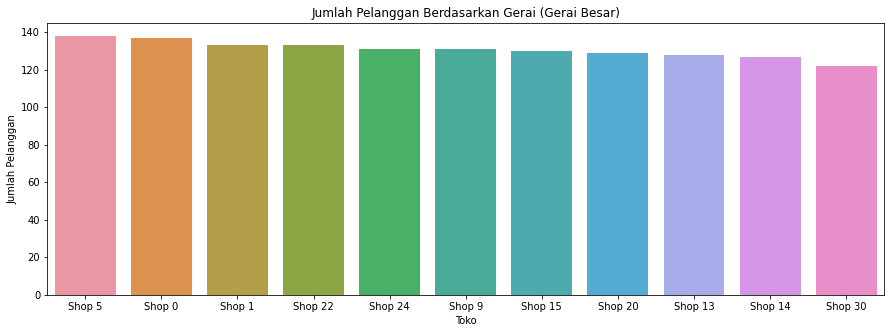

In [ ]:
# Menampilkan bar chart untuk visualisasi jumlah pelanggan berdasarkan toko
plt.figure(figsize=(15,5))
sns.barplot(x='shop_id', y='total_customer'
            , data=uniq_customer
            , capsize=10)
plt.xlabel('Toko')
plt.ylabel('Jumlah Pelanggan')
plt.title('Jumlah Pelanggan Berdasarkan Gerai (Gerai Besar)')
plt.show()

Bahwa `Shop 5` mempunyai pelanggan terbanyak untuk gerai besar dengan total 138 pelanggan.

In [ ]:
# Melihat jumlah pembayaran yang dilakukan untuk setiap gerai (shop)
count_purchase_per_shop = top_shop.pivot_table(index='shop_id', values='customer_id', 
                                               aggfunc='count').reset_index()
count_purchase_per_shop.columns = ['shop_id', 'total_purchase']
count_purchase_per_shop = count_purchase_per_shop.sort_values('total_purchase', ascending=False)
count_purchase_per_shop

,shop_id,total_purchase
1,Shop 1,2744
4,Shop 15,2710
7,Shop 24,2656
6,Shop 22,2601
9,Shop 5,2510
10,Shop 9,2496
2,Shop 13,2448
5,Shop 20,2435
3,Shop 14,2400
8,Shop 30,2395


In [ ]:
print('Jumlah total pembayaran yang dilakukan pelanggan untuk gerai-gerai besar yaitu {} pembayaran untuk semua gerai.'.format(count_purchase_per_shop['total_purchase'].sum().round()))

Jumlah total pembayaran yang dilakukan pelanggan untuk gerai-gerai besar yaitu 27775 pembayaran untuk semua gerai.


In [ ]:
print('Rata-rata pembayaran yang dilakukan pelanggan untuk gerai-gerai besar yaitu {} pembayaran berdasarkan per-gerai.'.format(count_purchase_per_shop['total_purchase'].mean().round()))

Rata-rata pembayaran yang dilakukan pelanggan untuk gerai-gerai besar yaitu 2525.0 pembayaran berdasarkan per-gerai.


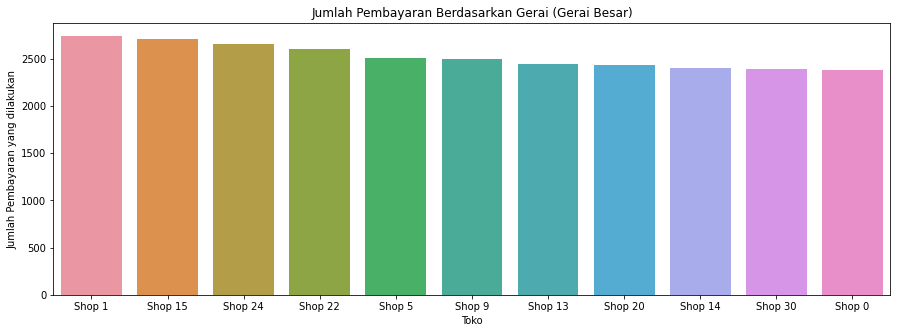

In [ ]:
# Menampilkan bar chart untuk visualisasi jumlah pelanggan berdasarkan toko
plt.figure(figsize=(15,5))
sns.barplot(x='shop_id', y='total_purchase'
            , data=count_purchase_per_shop
            , capsize=10)
plt.xlabel('Toko')
plt.ylabel('Jumlah Pembayaran yang dilakukan')
plt.title('Jumlah Pembayaran Berdasarkan Gerai (Gerai Besar)')
plt.show()

Bahwa `Shop 1` mempunyai pemabayaran terbanyak yang dilakukan pelanggan dalam kategori gerai besar.

In [ ]:
# Melihat jumlah pembayaran yang dilakukan berdasarkan waktu
customer_purchased_per_day = top_shop.pivot_table(index='date', values='customer_id', aggfunc='count').reset_index()
customer_purchased_per_day.columns = ['date', 'total_purchased']
customer_purchased_per_day

,date,total_purchased
0,2016-12-01,542
1,2016-12-02,754
2,2016-12-03,315
3,2016-12-05,1381
4,2016-12-06,804
...,...,...
63,2017-02-23,420
64,2017-02-24,406
65,2017-02-25,229
66,2017-02-27,445


In [ ]:
# Jumlah pemabyaran yang dilakukan pelanggan berdasarkan waktu
customer_purchased_per_day['total_purchased'].sum()

27775

Jumlah pembayaran yang dilakukan pelanggan untuk waktu yang ditentukan adalah 27775 pemabayaran yang sudah dilakukan.

In [ ]:
# Rata-rata pemabyaran yang dilakukan pelanggan dalam perhari
customer_purchased_per_day['total_purchased'].mean().round()

408.0

Jumlah rata-rata pembayaran yang dilakukan pelanggan untuk waktu yang ditentukan adalah 408 pembayaran yang dilakukan dalam per-harinya.

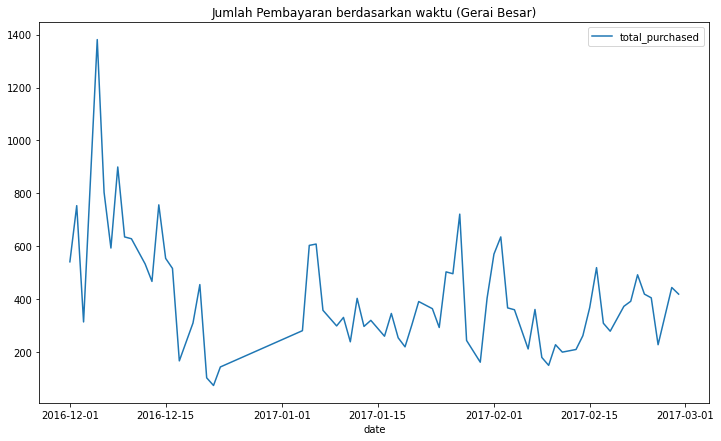

In [ ]:
# Memvisualisasikan riwayat pemabayaran dalam perhari yang sudah ditentukan
customer_purchased_per_day.plot(x='date', y='total_purchased', kind='line', figsize=(12,7))
plt.title('Jumlah Pembayaran berdasarkan waktu (Gerai Besar)')

plt.show()

In [ ]:
# Melihat untuk jumlah pembayaran paling sedikit
customer_purchased_per_day['total_purchased'].min()

75

In [ ]:
# Melihat tanggal untuk pembayaran paling sedikit
customer_purchased_per_day[customer_purchased_per_day['total_purchased']==75]

,date,total_purchased
18,2016-12-22,75


Pembayaran yang paling sedikit dilakukan terjadi pada tanggal 22 Desember 2016 dengan jumlah pembayaran terjadi 75 kali.

In [ ]:
# Melihat untuk pembayaran paling banyak
customer_purchased_per_day['total_purchased'].max()

1381

In [ ]:
# Melihat tanggal untuk pembayaran paling banyak
customer_purchased_per_day[customer_purchased_per_day['total_purchased']==1381]

,date,total_purchased
3,2016-12-05,1381


Pembayaran yang paling banyak dilakukan terjadi pada tanggal 5 Desember 2016 dengan jumlah pembayaran terjadi 1381 kali.

In [ ]:
# Melihat jumlah pelanggan yang melakukan pembayaran untuk berdasarkan waktu
customer_unique_per_day = top_shop.pivot_table(index='date', values='customer_id', aggfunc='nunique').reset_index()
customer_unique_per_day.columns = ['date', 'total_customer']
customer_unique_per_day

,date,total_customer
0,2016-12-01,41
1,2016-12-02,48
2,2016-12-03,18
3,2016-12-05,36
4,2016-12-06,41
...,...,...
63,2017-02-23,25
64,2017-02-24,19
65,2017-02-25,13
66,2017-02-27,18


In [ ]:
# Total pelanggan berdasarkan waktu yang ditentukan
customer_unique_per_day['total_customer'].sum()

1453

Jumlah pelanggan dalam setiap harinya untuk waktu ditentukan adalah 1453 pelanggan.

In [ ]:
# Rata-rata pelanggan per-harinya
customer_unique_per_day['total_customer'].mean().round()

21.0

Rata-rata pelanggan selama waktu yang ditentukan adalah 21 pelanggan dalam per-harinya

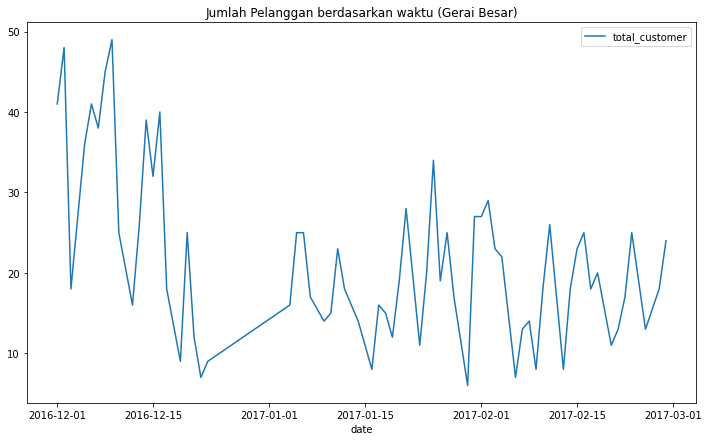

In [ ]:
# Memvisualisasikan jumlah pelanggan berdasarkan per-harinya
customer_unique_per_day.plot(x='date', y='total_customer', kind='line', figsize=(12,7))
plt.title('Jumlah Pelanggan berdasarkan waktu (Gerai Besar)')

plt.show()

In [ ]:
# Melihat untuk jumlah pelanggan paling sedikit
customer_unique_per_day['total_customer'].min()

6

In [ ]:
# Melihat tanggal untuk jumlah pelanggan paling sedikit
customer_unique_per_day[customer_unique_per_day['total_customer']==6]

,date,total_customer
42,2017-01-30,6


Jumlah pelanggan yang melakukan pembayaran paling sedikit adalah 6 pelanggan yang terjadi pada tanggal 30 Januari 2017.

In [ ]:
# Melihat untuk jumlah pelanggan paling banyak
customer_unique_per_day['total_customer'].max()

49

In [ ]:
# Melihat tanggal untuk jumlah pelanggan paling banyak
customer_unique_per_day[customer_unique_per_day['total_customer']==49]

,date,total_customer
7,2016-12-09,49


Jumlah pelanggan yang melakukan pembayaran paling banyak adalah 49 pelanggan yang terjadi pada tanggal 9 Desember 2016.

#### Analisis Untuk Jumlah dan rata-rata barang dalam keranjang Untuk Gerai Besar

In [ ]:
# Melihat jumlah barang dalam keranjang berdasarkan pembayaran
qunatity_count_per_purchase = top_shop.pivot_table(index='purchase_id', values='quantity', 
                                                aggfunc='sum').reset_index()
qunatity_count_per_purchase = qunatity_count_per_purchase.sort_values('quantity', ascending=False)
qunatity_count_per_purchase

,purchase_id,quantity
706,541431,74214
676,541206,8131
636,540815,7041
679,541220,6159
723,541570,6039
...,...,...
630,540797,1
704,541420,1
762,541808,1
816,542132,1


In [ ]:
# Total jumlah barang yang sudah teridentifikasikan dalam pemabayaran
qunatity_count_per_purchase['quantity'].sum()

399733

Total barang yang sudah terjualan sebanyak 399.733 barang.

In [ ]:
# Rata-rata barang yang terjual untuk setiap pemabayaran
qunatity_count_per_purchase['quantity'].mean().round()

260.0

Rata-rata barang yang terjual untuk setiap pembayarannya yaitu 260 per-pembayaran.

In [ ]:
# Total pembayaran dengan jumlah barang paling banyak
qunatity_count_per_purchase['quantity'].max()

74214

Jumlah barang yang paling banyak yaitu 74.214 barang dalam sekali pembayaran.

In [ ]:
# Total pembayaran dengan jumlah barang paling sedikit
qunatity_count_per_purchase['quantity'].min()

1

Jumlah barang yang paling sedikit yaitu 1 barang dalam sekali pembayaran.

In [ ]:
# Melihat jumlah barang dalam keranjang berdasarkan toko
qunatity_count_per_shop = top_shop.pivot_table(index='shop_id', values='quantity', 
                                                aggfunc='sum').reset_index()
qunatity_count_per_shop = qunatity_count_per_shop.sort_values('quantity', ascending=False)
qunatity_count_per_shop

,shop_id,quantity
4,Shop 15,109201
9,Shop 5,41984
8,Shop 30,34293
5,Shop 20,31883
2,Shop 13,30762
7,Shop 24,30689
10,Shop 9,28215
6,Shop 22,24232
0,Shop 0,24162
1,Shop 1,23364


In [ ]:
# Menghitung jumlah semua barang dari semua gerai besar
qunatity_count_per_shop['quantity'].sum()

399733

Jumlah barang yang masuk keranjang ada 399.733 barang untuk semua gerai besar.

In [ ]:
# Menghitung rata-rata barang dari semua gerai besar
qunatity_count_per_shop['quantity'].mean().round()

36339.0

Rata-rata barang yang masuk keranjang ada 36.339 barang untuk semua gerai besar.

In [ ]:
# Jumlah barang paling banyak
qunatity_count_per_shop['quantity'].max()

109201

In [ ]:
# Melihat data untuk jumlah barang paling banyak
qunatity_count_per_shop[qunatity_count_per_shop['quantity'] == 109201]

,shop_id,quantity
4,Shop 15,109201


`Shop 15` merupakan toko paling banyak untuk keranjang barangnya dengan total 109.201 barang.

In [ ]:
# Jumlah barang paling sedikit
qunatity_count_per_shop['quantity'].min()

20948

In [ ]:
# Melihat data untuk jumlah barang paling sedikit
qunatity_count_per_shop[qunatity_count_per_shop['quantity'] == 20948]

,shop_id,quantity
3,Shop 14,20948


`Shop 14` merupakan toko paling sedikit untuk keranjang barangnya dengan total 20.948 barang.

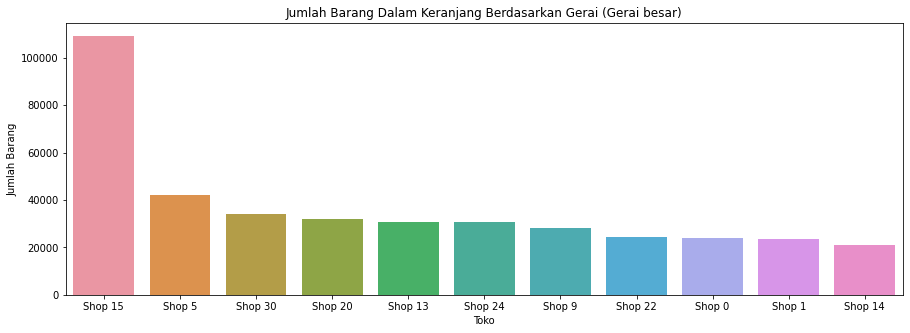

In [ ]:
# Menampilkan bar chart untuk visualisasi jumlah barang masuk keranjang berdasarkan toko
plt.figure(figsize=(15,5))
sns.barplot(x='shop_id', y='quantity'
            , data=qunatity_count_per_shop
            , capsize=10)
plt.xlabel('Toko')
plt.ylabel('Jumlah Barang')
plt.title('Jumlah Barang Dalam Keranjang Berdasarkan Gerai (Gerai besar)')
plt.show()

In [ ]:
#Melihat jumlah barang dalam keranjang berdasarkan per-hari
qunatity_count_per_day = top_shop.pivot_table(index='date', values='quantity', 
                                              aggfunc='sum').reset_index()
qunatity_count_per_day

,date,quantity
0,2016-12-01,7372
1,2016-12-02,9935
2,2016-12-03,3748
3,2016-12-05,6760
4,2016-12-06,5752
...,...,...
63,2017-02-23,3869
64,2017-02-24,3458
65,2017-02-25,3642
66,2017-02-27,2644


In [ ]:
# Menghitung jumlah semua barang dari semua gerai besar
qunatity_count_per_day['quantity'].sum()

399733

Semua seperti diatas, jumlah barangnya berdasarkan per-hari totalnya ada 399.733 barang.

In [ ]:
# Rata-rata barang 
qunatity_count_per_day['quantity'].mean().round()

5878.0

Rata-rata barang yang masuk keranjang sebanyak 5.878 untuk per-harinya.

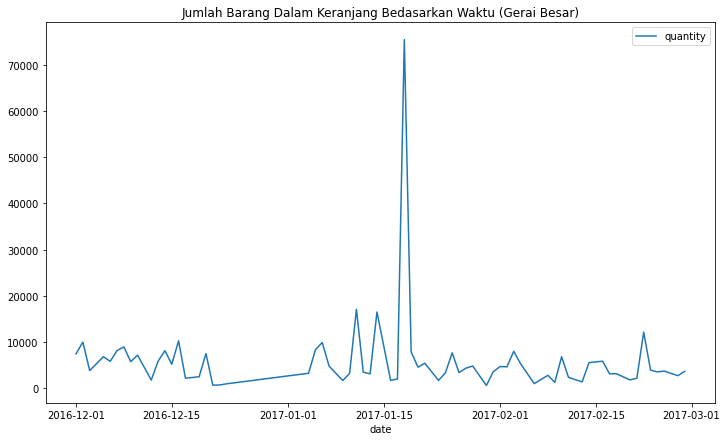

In [ ]:
# Memvisualisasikan jumlah barangnya berdasarkan per-harinya
qunatity_count_per_day.plot(x='date', y='quantity', kind='line', figsize=(12,7))
plt.title('Jumlah Barang Dalam Keranjang Bedasarkan Waktu (Gerai Besar)')

plt.show()

In [ ]:
# Melihat jumlah barang yang paling banyak masuk keranjang
qunatity_count_per_day['quantity'].max()

75562

In [ ]:
# Melihat datanya untuk jumlah barang yang paling banyak masuk keranjang
qunatity_count_per_day[qunatity_count_per_day['quantity'] == 75562]

,date,quantity
32,2017-01-18,75562


Jumlah barang yang paling banyak masuk keranjang yaitu sebanyak 75.562 barang pada tanggal 18 Januari 2017.

In [ ]:
# Melihat jumlah barang yang paling banyak sedikit masuk keranjang
qunatity_count_per_day['quantity'].min()

511

In [ ]:
# Melihat datanya untuk jumlah barang yang paling sedikit masuk keranjang
qunatity_count_per_day[qunatity_count_per_day['quantity'] == 511]

,date,quantity
42,2017-01-30,511


Jumlah barang yang paling sedikit masuk keranjang yaitu sebanyak 511 barang pada tanggal 30 Januari 2017.

#### Jumlah Anggota Program Loyalitas Untuk Gerai Besar

Untuk kolom `loyalty_program` pada tabel retail merupakan penjelasan untuk pembeli yang menggunakan program loyalitas atau tidak menggunakannya. Untuk nilai `0` menyatakan bahwa pembeli tersebut tidak meggunakan program loyalitas dan untuk nilai `1` bahwa pembeli tersebut meggunakan program loyalitas.

In [ ]:
#Melihat jumlah barang dalam keranjang berdasarkan per-hari
identifty_loyalty_program = top_shop.pivot_table(index=['shop_id', 'loyalty_program'], values='customer_id', 
                                                 aggfunc='nunique').reset_index()
identifty_loyalty_program

,shop_id,loyalty_program,customer_id
0,Shop 0,0,97
1,Shop 0,1,40
2,Shop 1,0,94
3,Shop 1,1,39
4,Shop 13,0,78
5,Shop 13,1,50
6,Shop 14,0,88
7,Shop 14,1,39
8,Shop 15,0,93
9,Shop 15,1,37


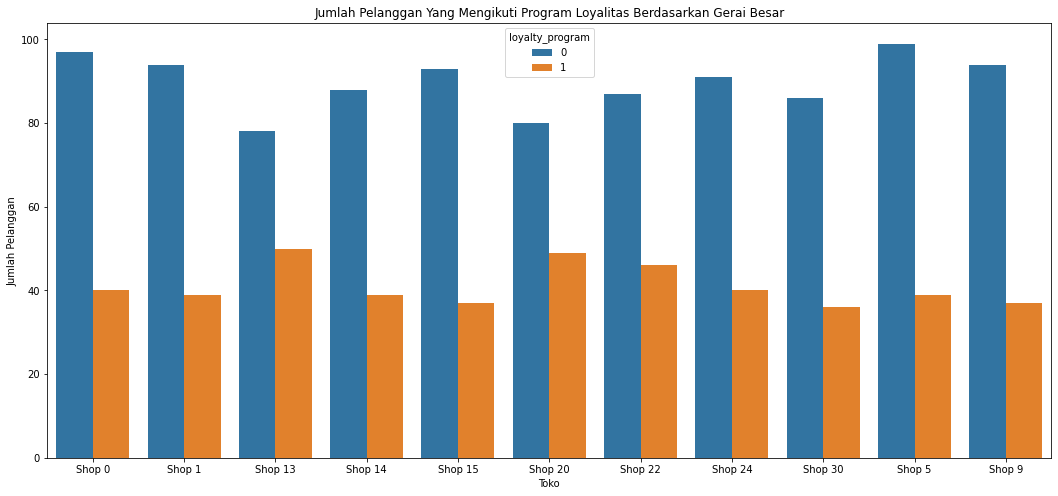

In [ ]:
# Memvisualisasikan perbandingan untuk pelanggan yang mengikuti program loyalitas berdasarkan gerai besar
plt.figure(figsize=(18, 8))
sns.barplot(data=identifty_loyalty_program, x='shop_id', y='customer_id', hue='loyalty_program')

plt.xlabel('Toko')
plt.ylabel('Jumlah Pelanggan')
plt.title('Jumlah Pelanggan Yang Mengikuti Program Loyalitas Berdasarkan Gerai Besar')
plt.show()

Untuk pelanggan yang mengikuti program loyalitas paling banyak pada toko `Shop 13` dan yang paling sedikit pada toko `Shop 30`. Untuk pelanggan yang tidak mengikuti program loyalitas paling banyak pada toko `Shop 5` dan yang paling sedikit pada toko `Shop 13`.

In [ ]:
# Mengidentifikasikan pelanggan yang mengikuti program loyalitas
top_shop_loyalty_program = identifty_loyalty_program[identifty_loyalty_program['loyalty_program'] == 1]
top_shop_loyalty_program.sort_values('customer_id', ascending=False)

,shop_id,loyalty_program,customer_id
5,Shop 13,1,50
11,Shop 20,1,49
13,Shop 22,1,46
1,Shop 0,1,40
15,Shop 24,1,40
3,Shop 1,1,39
7,Shop 14,1,39
19,Shop 5,1,39
9,Shop 15,1,37
21,Shop 9,1,37


In [ ]:
# Melihat total jumlah pelanggan yang mengikuti program loyalitas
top_shop_loyalty_program['customer_id'].sum()

452

Jumlah pelanggan yang mengikuti program loyalitas sebanyak 452 pelanggan.

In [ ]:
# Melihat toko yang mempunyai jumlah pelanggan yang paling sedikit mengikuti program loyalitas
top_shop_loyalty_program['customer_id'].min()

36

In [ ]:
# Melihat datanya
top_shop_loyalty_program[top_shop_loyalty_program['customer_id']==36]

,shop_id,loyalty_program,customer_id
17,Shop 30,1,36


`Shop 30` adalah toko dengan jumlah pelanggan yang paling sedikit mengikuti program loyalitas dengan jumlah pelanggan 36 orang.

In [ ]:
# Melihat toko yang mempunyai jumlah pelanggan yang paling banyak mengikuti program loyalitas
top_shop_loyalty_program['customer_id'].max()

50

In [ ]:
# Melihat datanya
top_shop_loyalty_program[top_shop_loyalty_program['customer_id']==50]

,shop_id,loyalty_program,customer_id
5,Shop 13,1,50


`Shop 13` adalah toko dengan jumlah pelanggan yang paling banyak mengikuti program loyalitas dengan jumlah pelanggan 50 orang.

In [ ]:
# Mengidentifikasikan pelanggan yang tidak mengikuti program loyalitas
top_shop_non_loyalty_program = identifty_loyalty_program[identifty_loyalty_program['loyalty_program'] == 0]
top_shop_non_loyalty_program.sort_values('customer_id', ascending=False)

,shop_id,loyalty_program,customer_id
18,Shop 5,0,99
0,Shop 0,0,97
2,Shop 1,0,94
20,Shop 9,0,94
8,Shop 15,0,93
14,Shop 24,0,91
6,Shop 14,0,88
12,Shop 22,0,87
16,Shop 30,0,86
10,Shop 20,0,80


In [ ]:
# Melihat total jumlah pelanggan yang tidak mengikuti program loyalitas
top_shop_non_loyalty_program['customer_id'].sum()

987

Jumlah pelanggan yang tidak mengikuti program loyalitas sebanyak 987 pelanggan.

In [ ]:
# Melihat toko yang mempunyai jumlah pelanggan yang paling sedikit tidak mengikuti program loyalitas
top_shop_non_loyalty_program['customer_id'].min()

78

In [ ]:
# Melihat datanya
top_shop_non_loyalty_program[top_shop_non_loyalty_program['customer_id']==78]

,shop_id,loyalty_program,customer_id
4,Shop 13,0,78


`Shop 13` adalah toko dengan jumlah pelanggan yang paling sedikit tidak mengikuti program loyalitas dengan jumlah pelanggan 78 orang.

In [ ]:
# Melihat toko yang mempunyai jumlah pelanggan yang paling banyak tidak mengikuti program loyalitas
top_shop_non_loyalty_program['customer_id'].max()

99

In [ ]:
# Melihat datanya
top_shop_non_loyalty_program[top_shop_non_loyalty_program['customer_id']==99]

,shop_id,loyalty_program,customer_id
18,Shop 5,0,99


`Shop 13` adalah toko dengan jumlah pelanggan yang paling banyak tidak mengikuti program loyalitas dengan jumlah pelanggan 78 orang.

#### Analisis Retensi Untuk Gerai Besar

In [ ]:
# Melihat data
top_shop.head()

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,price_per_one,income,year,month,week,date
1,541566,21873,35,2017-01-19 11:50:00,23401.0,1,Shop 22,0.42,14.70,2017-01-01,2017-01-01,2017-01-19,2017-01-19
2,538843,21873,1,2016-12-14 13:18:00,21712.0,0,Shop 9,0.42,0.42,2016-01-01,2016-12-01,2016-12-08,2016-12-14
4,543592,21873,5,2017-02-10 11:57:00,22922.0,1,Shop 15,0.42,2.10,2017-01-01,2017-02-01,2017-02-09,2017-02-10
17,537868,21873,23,2016-12-08 16:49:00,18112.0,0,Shop 15,0.42,9.66,2016-01-01,2016-12-01,2016-12-08,2016-12-08
22,542420,21873,1,2017-01-27 18:05:00,22859.0,1,Shop 22,0.42,0.42,2017-01-01,2017-01-01,2017-01-26,2017-01-27


In [ ]:
# Mengelompokkan tanggal pertama pembelian berdasarkan id pelanggan
top_shop_first_visits = top_shop.groupby('customer_id').agg({'purchase_date': 'min'}).reset_index()
top_shop_first_visits.columns = ['customer_id', 'first_visit']
top_shop_first_visits

,customer_id,first_visit
0,18025.0,2017-01-18 10:01:00
1,18026.0,2016-12-07 14:57:00
2,18041.0,2017-02-17 10:30:00
3,18049.0,2016-12-14 12:58:00
4,18052.0,2017-02-01 13:10:00
...,...,...
964,23924.0,2016-12-19 14:58:00
965,23929.0,2017-02-02 13:16:00
966,23936.0,2017-02-16 15:13:00
967,23939.0,2017-01-21 17:04:00


In [ ]:
# Mengekstrak waktunya menjadi tahun, bulan, minggu, dan hari
top_shop_first_visits['year_first']  = top_shop_first_visits['first_visit'].astype('datetime64[Y]')
top_shop_first_visits['month_first'] = top_shop_first_visits['first_visit'].astype('datetime64[M]')
top_shop_first_visits['week_first']  = top_shop_first_visits['first_visit'].astype('datetime64[W]')
top_shop_first_visits['date_first']  = top_shop_first_visits['first_visit'].dt.date
top_shop_first_visits.head()

,customer_id,first_visit,year_first,month_first,week_first,date_first
0,18025.0,2017-01-18 10:01:00,2017-01-01,2017-01-01,2017-01-12,2017-01-18
1,18026.0,2016-12-07 14:57:00,2016-01-01,2016-12-01,2016-12-01,2016-12-07
2,18041.0,2017-02-17 10:30:00,2017-01-01,2017-02-01,2017-02-16,2017-02-17
3,18049.0,2016-12-14 12:58:00,2016-01-01,2016-12-01,2016-12-08,2016-12-14
4,18052.0,2017-02-01 13:10:00,2017-01-01,2017-02-01,2017-01-26,2017-02-01


In [ ]:
# Menggabungkan data pada data utama
top_shop = pd.merge(top_shop, top_shop_first_visits, on = 'customer_id')
top_shop.head()

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,price_per_one,income,year,month,week,date,first_visit,year_first,month_first,week_first,date_first
0,541566,21873,35,2017-01-19 11:50:00,23401.0,1,Shop 22,0.42,14.70,2017-01-01,2017-01-01,2017-01-19,2017-01-19,2016-12-14 11:33:00,2016-01-01,2016-12-01,2016-12-08,2016-12-14
1,541566,85184C,23,2017-01-19 11:50:00,23401.0,1,Shop 22,1.25,28.75,2017-01-01,2017-01-01,2017-01-19,2017-01-19,2016-12-14 11:33:00,2016-01-01,2016-12-01,2016-12-08,2016-12-14
2,541566,21876,35,2017-01-19 11:50:00,23401.0,1,Shop 22,0.42,14.70,2017-01-01,2017-01-01,2017-01-19,2017-01-19,2016-12-14 11:33:00,2016-01-01,2016-12-01,2016-12-08,2016-12-14
3,541566,85174,15,2017-01-19 11:50:00,23401.0,1,Shop 22,1.95,29.25,2017-01-01,2017-01-01,2017-01-19,2017-01-19,2016-12-14 11:33:00,2016-01-01,2016-12-01,2016-12-08,2016-12-14
4,C538763,22107,9,2016-12-14 11:33:00,23401.0,1,Shop 13,3.75,33.75,2016-01-01,2016-12-01,2016-12-08,2016-12-14,2016-12-14 11:33:00,2016-01-01,2016-12-01,2016-12-08,2016-12-14


In [ ]:
# Menghitung jumlah hari untuk pembayran pertama terhadap pembayran selanjutnya (dan konversi bulan)
top_shop['age_days'] = (top_shop['date'] - top_shop['date_first']).dt.days
top_shop['age_month'] = round(top_shop['age_days'] / 30,0).astype('int')
top_shop.head()

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,price_per_one,income,year,month,week,date,first_visit,year_first,month_first,week_first,date_first,age_days,age_month
0,541566,21873,35,2017-01-19 11:50:00,23401.0,1,Shop 22,0.42,14.70,2017-01-01,2017-01-01,2017-01-19,2017-01-19,2016-12-14 11:33:00,2016-01-01,2016-12-01,2016-12-08,2016-12-14,36,1
1,541566,85184C,23,2017-01-19 11:50:00,23401.0,1,Shop 22,1.25,28.75,2017-01-01,2017-01-01,2017-01-19,2017-01-19,2016-12-14 11:33:00,2016-01-01,2016-12-01,2016-12-08,2016-12-14,36,1
2,541566,21876,35,2017-01-19 11:50:00,23401.0,1,Shop 22,0.42,14.70,2017-01-01,2017-01-01,2017-01-19,2017-01-19,2016-12-14 11:33:00,2016-01-01,2016-12-01,2016-12-08,2016-12-14,36,1
3,541566,85174,15,2017-01-19 11:50:00,23401.0,1,Shop 22,1.95,29.25,2017-01-01,2017-01-01,2017-01-19,2017-01-19,2016-12-14 11:33:00,2016-01-01,2016-12-01,2016-12-08,2016-12-14,36,1
4,C538763,22107,9,2016-12-14 11:33:00,23401.0,1,Shop 13,3.75,33.75,2016-01-01,2016-12-01,2016-12-08,2016-12-14,2016-12-14 11:33:00,2016-01-01,2016-12-01,2016-12-08,2016-12-14,0,0


In [ ]:
# Membuat analisa kohort dengan agregrasi data/ pivot tabel
cohorts_top_shop = top_shop.pivot_table(index='month_first',
                                        columns='age_month',
                                        values='customer_id',
                                        aggfunc='nunique')

In [ ]:
# Menampilkan kohortnya
cohorts_top_shop.fillna('')

age_month,0,1,2,3
month_first,,,,
2016-12-01,464.0,81.0,109.0,21.0
2017-01-01,264.0,41.0,2.0,
2017-02-01,241.0,3.0,,


In [ ]:
# Membuat tingkat retensi
retention = pd.DataFrame()
for col in cohorts_top_shop.columns:
    retention = pd.concat([retention, cohorts_top_shop[col] / cohorts_top_shop[0]], axis=1)
retention.columns = cohorts_top_shop.columns

<AxesSubplot:title={'center':'Kohort: Tingkat Retensi Pelanggan (Gerai Besar)'}, xlabel='age_month'>

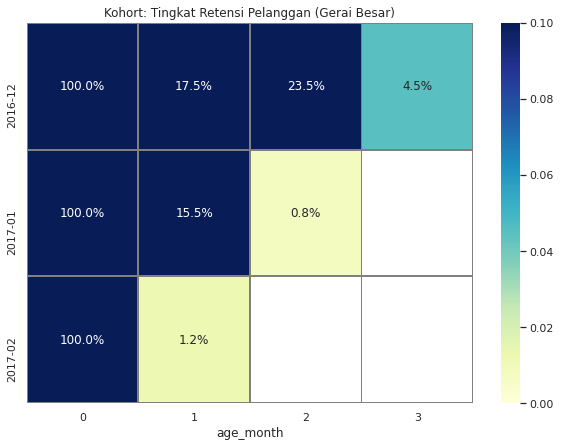

In [ ]:
# Menampilkan graifk tingkat retensi
sns.set(style='white')
plt.figure(figsize=(10, 7))
plt.title('Kohort: Tingkat Retensi Pelanggan (Gerai Besar)')
sns.heatmap(
    retention, annot=True, cmap='YlGnBu',fmt='.1%', linewidths=1, linecolor='gray', vmax=0.1, vmin=0,
    yticklabels = cohorts_top_shop.index.to_series().dt.strftime('%Y-%m'),
)

Kesimpulan:

Setelah melihat tingkat retensi melalui analisa kohort bahwa pelanggan yang masih banyak berbelanja pada gerai-gerai besar adalah pelanggan kohort Desember 2016. Bahkan di bulan 3 jumlah pelangganya lebih banyak dibanding kohort setelahnya pada bulan kedua dan pertamanya.

Analisis untuk semua yang berkaitan dengan gerai besar sudah selesai, saatnya untuk menganalisis yang sama untuk selain gerai besar.

### Analisa terhadap Gerai Lainnya (Selain Gerai Besar)

In [ ]:
# Membuat fungsi mengambil data 
def another_purchase_count(data, column):
    Q3=data[column].quantile(0.66)
    data_new = data[(data[column] < Q3)]
    return data_new

In [ ]:
# Mengambil toko dengan jumlah pembayaran terbanyak.
another_shopx = another_purchase_count(data= purchase_per_shop, column= 'purchase_id')
top_purchase.columns = ['shop_id', 'total_purchase']
another_shopx.sort_values('shop_id')

,shop_id,purchase_id
18,Shop 10,2204
15,Shop 11,2301
27,Shop 12,1786
25,Shop 16,1939
20,Shop 17,2178
22,Shop 18,2022
17,Shop 19,2242
16,Shop 2,2248
29,Shop 21,1654
21,Shop 23,2075


Ternyata dari 2/3 dengan jumlah pembayaran ada 19 toko yang terpilih, yaitu:

- Shop 2
- Shop 3
- Shop 4
- Shop 6
- Shop 7
- Shop 8
- Shop 10
- Shop 11
- Shop 12
- Shop 16
- Shop 17
- Shop 18
- Shop 19
- Shop 21
- Shop 23
- Shop 25
- Shop 27
- Shop 28
- Shop 29

Gerai-gerai ini merupakan `Gerai Lainnya`.

In [ ]:
# Mengidentifikasi data keseluruhan 
another_shop = df_final.loc[(df_final['shop_id'] == 'Shop 2') | (df_final['shop_id'] == 'Shop 3') | (df_final['shop_id'] == 'Shop 4') |
                        (df_final['shop_id'] == 'Shop 6') | (df_final['shop_id'] == 'Shop 7') | (df_final['shop_id'] == 'Shop 8') |
                        (df_final['shop_id'] == 'Shop 10') | (df_final['shop_id'] == 'Shop 11') | (df_final['shop_id'] == 'Shop 12') |
                        (df_final['shop_id'] == 'Shop 16') | (df_final['shop_id'] == 'Shop 17') | (df_final['shop_id'] == 'Shop 18') | 
                        (df_final['shop_id'] == 'Shop 19') | (df_final['shop_id'] == 'Shop 21') | (df_final['shop_id'] == 'Shop 23') | 
                        (df_final['shop_id'] == 'Shop 25') | (df_final['shop_id'] == 'Shop 27') | (df_final['shop_id'] == 'Shop 28') |
                        (df_final['shop_id'] == 'Shop 29')]
another_shop

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,price_per_one,income,year,month,week,date
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3,0.42,4.62,2016-01-01,2016-12-01,2016-12-08,2016-12-10
3,540838,21873,11,2017-01-11 15:13:00,19541.0,0,Shop 4,0.42,4.62,2017-01-01,2017-01-01,2017-01-05,2017-01-11
5,544651,21873,71,2017-02-22 12:51:00,19373.0,0,Shop 17,0.42,29.82,2017-01-01,2017-02-01,2017-02-16,2017-02-22
6,545062,21873,1,2017-02-27 14:07:00,18427.0,0,Shop 18,0.42,0.42,2017-01-01,2017-02-01,2017-02-23,2017-02-27
7,540480,21873,11,2017-01-07 15:27:00,18159.0,0,Shop 19,0.42,4.62,2017-01-01,2017-01-01,2017-01-05,2017-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69117,538200,15058A,1,2016-12-10 11:11:00,23591.0,1,Shop 23,7.95,7.95,2016-01-01,2016-12-01,2016-12-08,2016-12-10
69118,538852,90058B,35,2016-12-14 13:33:00,23051.0,1,Shop 8,0.38,13.30,2016-01-01,2016-12-01,2016-12-08,2016-12-14
69120,541848,90073,1,2017-01-23 13:31:00,23290.0,1,Shop 23,4.95,4.95,2017-01-01,2017-01-01,2017-01-19,2017-01-23
69123,C540246,79320,2,2017-01-05 15:43:00,18760.0,0,Shop 19,4.95,9.90,2017-01-01,2017-01-01,2017-01-05,2017-01-05


Selanjutnya perlu menganalisa untuk beberapa keperluan yang sama seperti gerai besar seperti:

- Jumlah Pelanggan (Unik)
- Ukuran pembelian rata-rata
- Jumlah rata-rata barang dalam keranjang
- Jumlah anggota program loyalitas

Sebelum memulai analisa eksplorasinya, perlu untuk mengidentifikasi gerai-gerai besar tadi dari tabel `df_final`.

#### Analisis untuk Jumlah Pelanggan dan Ukuran pembelian Untuk Gerai Lainnya

In [ ]:
# Melihat jumlah pembayaran yang dilakukan untuk setiap gerai (shop)
uniq_customer1 = another_shop.pivot_table(index='shop_id', values='customer_id', 
                                     aggfunc='nunique').reset_index()
uniq_customer1.columns = ['shop_id', 'total_customer']
uniq_customer1 = uniq_customer1.sort_values('total_customer', ascending=False)
uniq_customer1

,shop_id,total_customer
17,Shop 7,139
6,Shop 19,138
4,Shop 17,134
1,Shop 11,132
12,Shop 28,128
13,Shop 29,125
11,Shop 27,125
15,Shop 4,124
7,Shop 2,123
18,Shop 8,122


In [ ]:
print('Jumlah total pelanggan untuk gerai-gerai lainnya yaitu {} pelanggan untuk semua gerai.'.format(uniq_customer1['total_customer'].sum()))

Jumlah total pelanggan untuk gerai-gerai lainnya yaitu 2283 pelanggan untuk semua gerai.


In [ ]:
print('Rata-rata pelanggan untuk gerai-gerai lainnya yaitu {} pelanggan untuk setiap per-gerai.'.format(uniq_customer1['total_customer'].mean().round()))

Rata-rata pelanggan untuk gerai-gerai lainnya yaitu 120.0 pelanggan untuk setiap per-gerai.


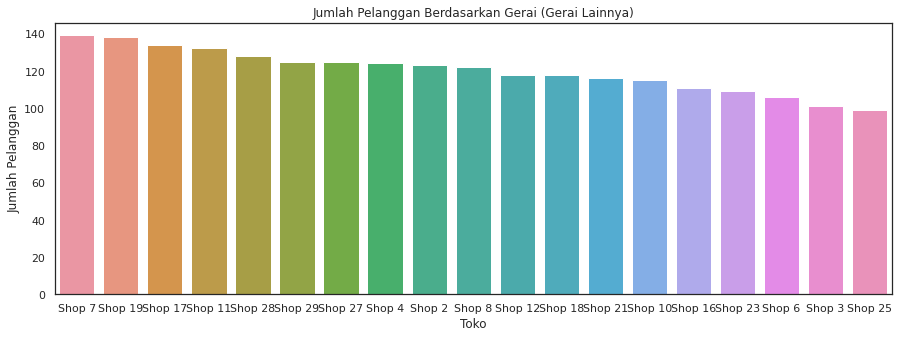

In [ ]:
# Menampilkan bar chart untuk visualisasi jumlah pelanggan berdasarkan toko
plt.figure(figsize=(15,5))
sns.barplot(x='shop_id', y='total_customer'
            , data=uniq_customer1
            , capsize=10)
plt.xlabel('Toko')
plt.ylabel('Jumlah Pelanggan')
plt.title('Jumlah Pelanggan Berdasarkan Gerai (Gerai Lainnya)')
plt.show()

Bahwa `Shop 7` mempunyai pelanggan terbanyak untuk gerai lainnya sebanyak 139 pelanggan.

In [ ]:
# Melihat jumlah pembayaran yang dilakukan untuk setiap gerai (shop)
count_purchase_per_shop1 = another_shop.pivot_table(index='shop_id', values='customer_id', 
                                               aggfunc='count').reset_index()
count_purchase_per_shop1.columns = ['shop_id', 'total_purchase']
count_purchase_per_shop1 = count_purchase_per_shop1.sort_values('total_purchase', ascending=False)
count_purchase_per_shop1

,shop_id,total_purchase
17,Shop 7,2368
11,Shop 27,2338
12,Shop 28,2324
1,Shop 11,2301
7,Shop 2,2248
6,Shop 19,2242
0,Shop 10,2204
13,Shop 29,2202
4,Shop 17,2178
9,Shop 23,2075


In [ ]:
print('Jumlah total pembayaran yang dilakukan pelanggan untuk gerai-gerai lainnya yaitu {} pembayaran untuk semua gerai.'.format(count_purchase_per_shop1['total_purchase'].sum().round()))

Jumlah total pembayaran yang dilakukan pelanggan untuk gerai-gerai lainnya yaitu 39010 pembayaran untuk semua gerai.


In [ ]:
print('Rata-rata pembayaran yang dilakukan pelanggan untuk gerai-gerai lainnya yaitu {} pembayaran berdasarkan per-gerai.'.format(count_purchase_per_shop1['total_purchase'].mean().round()))

Rata-rata pembayaran yang dilakukan pelanggan untuk gerai-gerai lainnya yaitu 2053.0 pembayaran berdasarkan per-gerai.


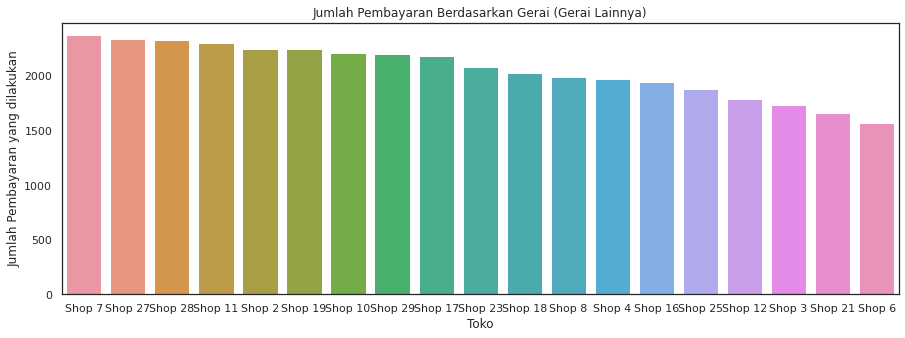

In [ ]:
# Menampilkan bar chart untuk visualisasi jumlah pelanggan berdasarkan toko
plt.figure(figsize=(15,5))
sns.barplot(x='shop_id', y='total_purchase'
            , data=count_purchase_per_shop1
            , capsize=10)
plt.xlabel('Toko')
plt.ylabel('Jumlah Pembayaran yang dilakukan')
plt.title('Jumlah Pembayaran Berdasarkan Gerai (Gerai Lainnya)')
plt.show()

Bahwa `Shop 7` mempunyai pemabayaran terbanyak yang dilakukan pelanggan dalam kategori gerai lainnya.

In [ ]:
# Melihat jumlah pembayaran yang dilakukan berdasarkan waktu
customer_purchased_per_day1 = another_shop.pivot_table(index='date', values='customer_id', aggfunc='count').reset_index()
customer_purchased_per_day1.columns = ['date', 'total_purchased']
customer_purchased_per_day1

,date,total_purchased
0,2016-12-01,1350
1,2016-12-02,1251
2,2016-12-03,695
3,2016-12-05,1276
4,2016-12-06,1021
...,...,...
63,2017-02-23,520
64,2017-02-24,679
65,2017-02-25,577
66,2017-02-27,367


In [ ]:
# Jumlah pemabyaran yang dilakukan pelanggan berdasarkan waktu
customer_purchased_per_day1['total_purchased'].sum()

39010

Jumlah pembayaran yang dilakukan pelanggan untuk waktu yang ditentukan adalah 39010 pemabayaran yang sudah dilakukan.

In [ ]:
# Rata-rata pemabyaran yang dilakukan pelanggan dalam perhari
customer_purchased_per_day1['total_purchased'].mean().round()

574.0

Jumlah rata-rata pembayaran yang dilakukan pelanggan untuk waktu yang ditentukan adalah 574 pembayaran yang dilakukan dalam per-harinya.

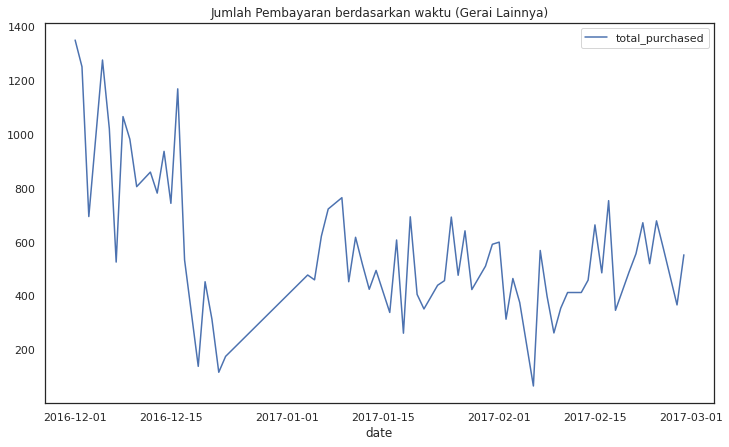

In [ ]:
# Memvisualisasikan riwayat pemabayaran dalam perhari yang sudah ditentukan
customer_purchased_per_day1.plot(x='date', y='total_purchased', kind='line', figsize=(12,7))
plt.title('Jumlah Pembayaran berdasarkan waktu (Gerai Lainnya)')

plt.show()

In [ ]:
# Melihat untuk jumlah pembayaran paling sedikit
customer_purchased_per_day1['total_purchased'].min()

66

In [ ]:
# Melihat tanggal untuk pembayaran paling sedikit
customer_purchased_per_day1[customer_purchased_per_day1['total_purchased']==66]

,date,total_purchased
48,2017-02-06,66


Pembayaran yang paling sedikit dilakukan terjadi pada tanggal 6 Februari 2017 dengan jumlah pembayaran terjadi 66 kali.

In [ ]:
# Melihat untuk jumlah pembayaran paling banyak
customer_purchased_per_day1['total_purchased'].max()

1350

In [ ]:
# Melihat tanggal untuk pembayaran paling banyak
customer_purchased_per_day1[customer_purchased_per_day1['total_purchased']==1350]

,date,total_purchased
0,2016-12-01,1350


Pembayaran yang paling banyak dilakukan terjadi pada tanggal 1 Desember 2016 dengan jumlah pembayaran terjadi 1350 kali.

In [ ]:
# Melihat jumlah pelanggan yang melakukan pembayaran untuk berdasarkan waktu
customer_unique_per_day1 = another_shop.pivot_table(index='date', values='customer_id', aggfunc='nunique').reset_index()
customer_unique_per_day1.columns = ['date', 'total_customer']
customer_unique_per_day1

,date,total_customer
0,2016-12-01,62
1,2016-12-02,76
2,2016-12-03,38
3,2016-12-05,46
4,2016-12-06,53
...,...,...
63,2017-02-23,29
64,2017-02-24,38
65,2017-02-25,31
66,2017-02-27,13


In [ ]:
# Total pelanggan berdasarkan waktu yang ditentukan
customer_unique_per_day1['total_customer'].sum()

2248

Jumlah pelanggan dalam setiap harinya untuk waktu ditentukan adalah 2248 pelanggan.

In [ ]:
# Rata-rata pelanggan per-harinya
customer_unique_per_day1['total_customer'].mean().round()

33.0

Rata-rata pelanggan selama waktu yang ditentukan adalah 33 pelanggan dalam per-harinya.

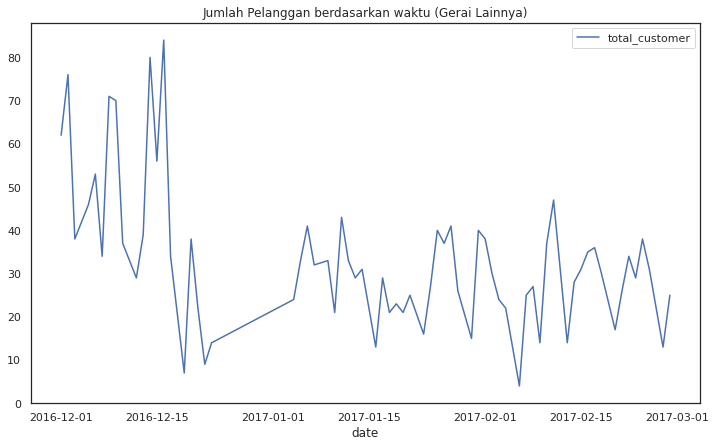

In [ ]:
# Memvisualisasikan jumlah pelanggan berdasarkan per-harinya
customer_unique_per_day1.plot(x='date', y='total_customer', kind='line', figsize=(12,7))
plt.title('Jumlah Pelanggan berdasarkan waktu (Gerai Lainnya)')

plt.show()

In [ ]:
# Melihat untuk jumlah pelanggan paling sedikit
customer_unique_per_day1['total_customer'].min()

4

In [ ]:
# Melihat tanggal untuk jumlah pelanggan paling sedikit
customer_unique_per_day1[customer_unique_per_day1['total_customer']==4]

,date,total_customer
48,2017-02-06,4


Jumlah pelanggan yang melakukan pembayaran paling sedikit adalah 4 pelanggan yang terjadi pada tanggal 6 Februari 2017.

In [ ]:
# Melihat untuk jumlah pelanggan paling banyak
customer_unique_per_day1['total_customer'].max()

84

In [ ]:
# Melihat tanggal untuk jumlah pelanggan paling banyak
customer_unique_per_day1[customer_unique_per_day1['total_customer']==84]

,date,total_customer
13,2016-12-16,84


Jumlah pelanggan yang melakukan pembayaran paling banyak adalah 84 pelanggan yang terjadi pada tanggal 16 Desember 2016.

#### Analisis Untuk Jumlah dan rata-rata barang dalam keranjang Untuk Gerai Lainnya

In [ ]:
# Melihat jumlah barang dalam keranjang berdasarkan pembayaran
qunatity_count_per_purchase1 = another_shop.pivot_table(index='purchase_id', values='quantity', 
                                                        aggfunc='sum').reset_index()
qunatity_count_per_purchase1 = qunatity_count_per_purchase1.sort_values('quantity', ascending=False)
qunatity_count_per_purchase1

,purchase_id,quantity
2257,C541433,74216
1990,C536757,9361
1668,543989,8315
1807,544479,8098
811,539731,6614
...,...,...
658,539056,1
317,537599,1
1203,541840,1
1239,541983,1


In [ ]:
# Total jumlah barang yang sudah teridentifikasikan dalam pemabayaran
qunatity_count_per_purchase1['quantity'].sum()

548647

Total barang yang sudah terjualan sebanyak 548.647 barang.

In [ ]:
# Rata-rata barang yang terjual untuk setiap pemabayaran
qunatity_count_per_purchase1['quantity'].mean().round()

223.0

Rata-rata barang yang terjual untuk setiap pembayarannya yaitu 223 per-pembayaran.

In [ ]:
# Total pembayaran dengan jumlah barang paling banyak
qunatity_count_per_purchase1['quantity'].max()

74216

Jumlah barang yang paling banyak yaitu 74.216 barang dalam sekali pembayaran.

In [ ]:
# Total pembayaran dengan jumlah barang paling sedikit
qunatity_count_per_purchase1['quantity'].min()

1

Jumlah barang yang paling sedikit yaitu 1 barang dalam sekali pembayaran.

In [ ]:
# Melihat jumlah barang dalam keranjang berdasarkan toko
qunatity_count_per_shop1 = another_shop.pivot_table(index='shop_id', values='quantity', 
                                                    aggfunc='sum').reset_index()
qunatity_count_per_shop1 = qunatity_count_per_shop1.sort_values('quantity', ascending=False)
qunatity_count_per_shop1

,shop_id,quantity
8,Shop 21,89685
15,Shop 4,35647
4,Shop 17,31032
0,Shop 10,30330
14,Shop 3,30082
9,Shop 23,29849
10,Shop 25,28809
12,Shop 28,27745
5,Shop 18,26223
11,Shop 27,24952


In [ ]:
# Menghitung jumlah semua barang dari semua gerai lainnya
qunatity_count_per_shop1['quantity'].sum()

548647

Jumlah barang yang masuk keranjang ada 548.647 barang untuk semua gerai lainnya.

In [ ]:
# Menghitung rata-rata barang dari semua gerai lainnya
qunatity_count_per_shop1['quantity'].mean().round()

28876.0

Rata-rata barang yang masuk keranjang ada 28.876 barang untuk semua gerai besar.

In [ ]:
# Jumlah barang paling banyak
qunatity_count_per_shop1['quantity'].max()

89685

In [ ]:
# Melihat data untuk jumlah barang paling banyak
qunatity_count_per_shop1[qunatity_count_per_shop1['quantity'] == 89685]

,shop_id,quantity
8,Shop 21,89685


`Shop 21` merupakan toko paling banyak untuk keranjang barangnya dengan total 89.685 barang.

In [ ]:
# Jumlah barang paling sedikit
qunatity_count_per_shop1['quantity'].min()

18925

In [ ]:
# Melihat data untuk jumlah barang paling banyak
qunatity_count_per_shop1[qunatity_count_per_shop1['quantity'] == 18925]

,shop_id,quantity
2,Shop 12,18925


`Shop 12` merupakan toko paling sedikit untuk keranjang barangnya dengan total 18.925 barang.

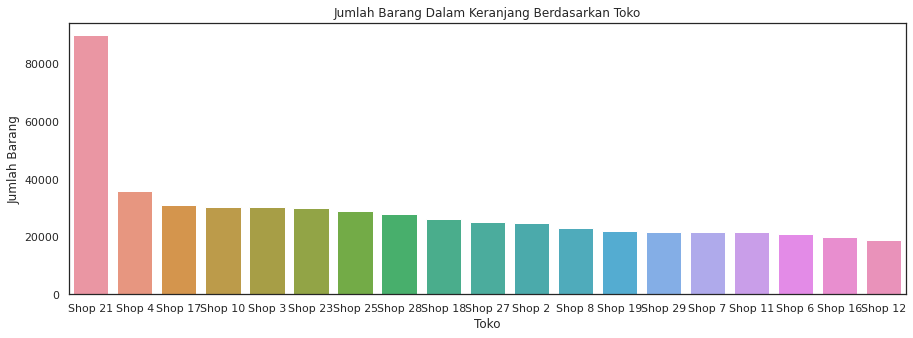

In [ ]:
# Menampilkan bar chart untuk visualisasi jumlah barang masuk keranjang berdasarkan toko
plt.figure(figsize=(15,5))
sns.barplot(x='shop_id', y='quantity'
            , data=qunatity_count_per_shop1
            , capsize=10)
plt.xlabel('Toko')
plt.ylabel('Jumlah Barang')
plt.title('Jumlah Barang Dalam Keranjang Berdasarkan Toko')
plt.show()

In [ ]:
#Melihat jumlah barang dalam keranjang berdasarkan per-hari
qunatity_count_per_day1 = another_shop.pivot_table(index='date', values='quantity', 
                                                   aggfunc='sum').reset_index()
qunatity_count_per_day1

,date,quantity
0,2016-12-01,15065
1,2016-12-02,29588
2,2016-12-03,7486
3,2016-12-05,7856
4,2016-12-06,8594
...,...,...
63,2017-02-23,7309
64,2017-02-24,6792
65,2017-02-25,6215
66,2017-02-27,1698


In [ ]:
# Menghitung jumlah semua barang dari semua gerai lainnya
qunatity_count_per_day1['quantity'].sum()

548647

Semua seperti diatas, jumlah barangnya berdasarkan per-hari totalnya ada 548.647 barang.

In [ ]:
# Rata-rata barang 
qunatity_count_per_day1['quantity'].mean().round()

8068.0

Rata-rata barang yang masuk keranjang sebanyak 8.068 untuk per-harinya.

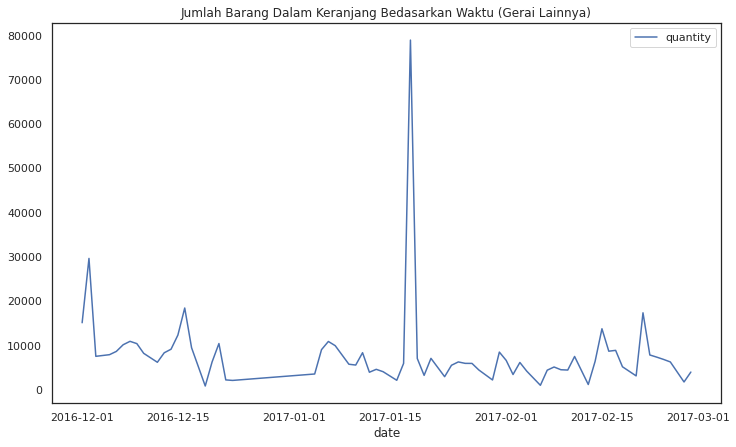

In [ ]:
# Memvisualisasikan jumlah barangnya berdasarkan per-harinya
qunatity_count_per_day1.plot(x='date', y='quantity', kind='line', figsize=(12,7))
plt.title('Jumlah Barang Dalam Keranjang Bedasarkan Waktu (Gerai Lainnya)')

plt.show()

In [ ]:
# Melihat jumlah barang yang paling banyak masuk keranjang
qunatity_count_per_day1['quantity'].max()

78879

In [ ]:
# Melihat datanya untuk jumlah barang yang paling banyak masuk keranjang
qunatity_count_per_day1[qunatity_count_per_day1['quantity'] == 78879]

,date,quantity
32,2017-01-18,78879


Jumlah barang yang paling banyak masuk keranjang yaitu sebanyak 78.879 barang pada tanggal 18 Januari 2017.

In [ ]:
# Melihat jumlah barang yang paling banyak sedikit masuk keranjang
qunatity_count_per_day1['quantity'].min()

785

In [ ]:
# Melihat datanya untuk jumlah barang yang paling sedikit masuk keranjang
qunatity_count_per_day1[qunatity_count_per_day1['quantity'] == 785]

,date,quantity
15,2016-12-19,785


Jumlah barang yang paling sedikit masuk keranjang yaitu sebanyak 785 barang pada tanggal 19 Desember 2017.

#### Jumlah Anggota Program Loyalitas Untuk Gerai Lainnya

Untuk kolom `loyalty_program` pada tabel retail merupakan penjelasan untuk pembeli yang menggunakan program loyalitas atau tidak menggunakannya. Untuk nilai `0` menyatakan bahwa pembeli tersebut tidak meggunakan program loyalitas dan untuk nilai `1` bahwa pembeli tersebut meggunakan program loyalitas.

In [ ]:
#Melihat jumlah barang dalam keranjang berdasarkan per-hari
identifty_loyalty_program1 = another_shop.pivot_table(index=['shop_id', 'loyalty_program'], values='customer_id', 
                                                      aggfunc='nunique').reset_index()
identifty_loyalty_program1

,shop_id,loyalty_program,customer_id
0,Shop 10,0,73
1,Shop 10,1,42
2,Shop 11,0,89
3,Shop 11,1,43
4,Shop 12,0,79
5,Shop 12,1,39
6,Shop 16,0,70
7,Shop 16,1,41
8,Shop 17,0,86
9,Shop 17,1,48


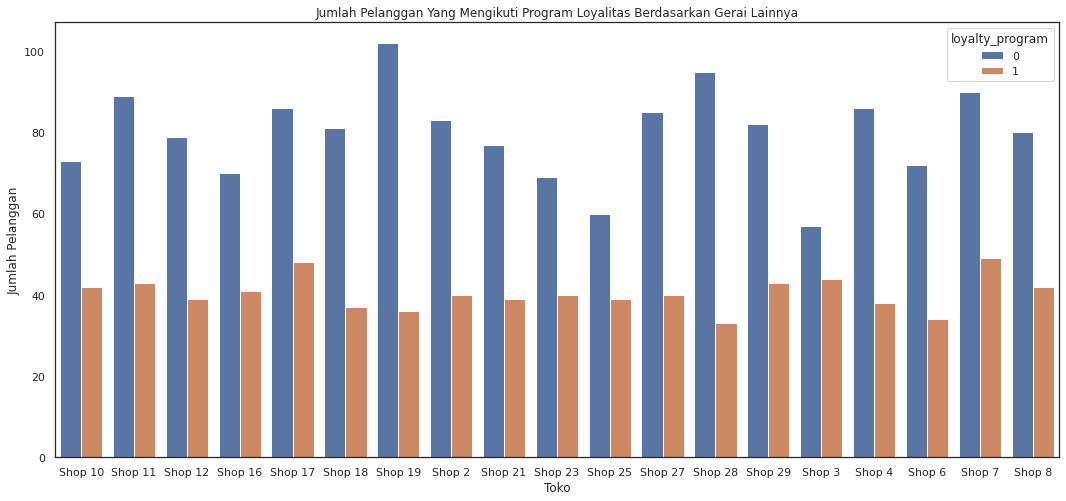

In [ ]:
# Memvisualisasikan perbandingan untuk pelanggan yang mengikuti program loyalitas berdasarkan gerai lainnya
plt.figure(figsize=(18, 8))
sns.barplot(data=identifty_loyalty_program1, x='shop_id', y='customer_id', hue='loyalty_program')

plt.xlabel('Toko')
plt.ylabel('Jumlah Pelanggan')
plt.title('Jumlah Pelanggan Yang Mengikuti Program Loyalitas Berdasarkan Gerai Lainnya')
plt.show()

Untuk pelanggan yang mengikuti program loyalitas paling banyak pada toko `Shop 7` dan yang paling sedikit pada toko `Shop 28`. Untuk pelanggan yang tidak mengikuti program loyalitas paling banyak pada toko `Shop 19` dan yang paling sedikit pada toko `Shop 3`.

In [ ]:
# Mengidentifikasikan pelanggan yang mengikuti program loyalitas
another_shop_loyalty_program = identifty_loyalty_program1[identifty_loyalty_program1['loyalty_program'] == 1]
another_shop_loyalty_program.sort_values('customer_id', ascending=False)

,shop_id,loyalty_program,customer_id
35,Shop 7,1,49
9,Shop 17,1,48
29,Shop 3,1,44
3,Shop 11,1,43
27,Shop 29,1,43
1,Shop 10,1,42
37,Shop 8,1,42
7,Shop 16,1,41
15,Shop 2,1,40
23,Shop 27,1,40


In [ ]:
# Melihat total jumlah pelanggan yang mengikuti program loyalitas
another_shop_loyalty_program['customer_id'].sum()

767

Jumlah pelanggan yang mengikuti program loyalitas sebanyak 767 pelanggan.

In [ ]:
# Melihat toko yang mempunyai jumlah pelanggan yang paling sedikit mengikuti program loyalitas
another_shop_loyalty_program['customer_id'].min()

33

In [ ]:
# Melihat datanya
another_shop_loyalty_program[another_shop_loyalty_program['customer_id']==33]

,shop_id,loyalty_program,customer_id
25,Shop 28,1,33


`Shop 28` adalah toko dengan jumlah pelanggan yang paling sedikit mengikuti program loyalitas dengan jumlah pelanggan 33 orang.

In [ ]:
# Melihat toko yang mempunyai jumlah pelanggan yang paling banyak mengikuti program loyalitas
another_shop_loyalty_program['customer_id'].max()

49

In [ ]:
# Melihat datanya
another_shop_loyalty_program[another_shop_loyalty_program['customer_id']==49]

,shop_id,loyalty_program,customer_id
35,Shop 7,1,49


`Shop 7` adalah toko dengan jumlah pelanggan yang paling banyak mengikuti program loyalitas dengan jumlah pelanggan 49 orang.

In [ ]:
# Mengidentifikasikan pelanggan yang tidak mengikuti program loyalitas
another_shop_non_loyalty_program = identifty_loyalty_program1[identifty_loyalty_program1['loyalty_program'] == 0]
another_shop_non_loyalty_program.sort_values('customer_id', ascending=False)

,shop_id,loyalty_program,customer_id
12,Shop 19,0,102
24,Shop 28,0,95
34,Shop 7,0,90
2,Shop 11,0,89
8,Shop 17,0,86
30,Shop 4,0,86
22,Shop 27,0,85
14,Shop 2,0,83
26,Shop 29,0,82
10,Shop 18,0,81


In [ ]:
# Melihat total jumlah pelanggan yang tidak mengikuti program loyalitas
another_shop_non_loyalty_program['customer_id'].sum()

1516

Jumlah pelanggan yang tidak mengikuti program loyalitas sebanyak 1516 pelanggan.

In [ ]:
# Melihat toko yang mempunyai jumlah pelanggan yang paling sedikit tidak mengikuti program loyalitas
another_shop_non_loyalty_program['customer_id'].min()

57

In [ ]:
# Melihat datanya
another_shop_non_loyalty_program[another_shop_non_loyalty_program['customer_id']==57]

,shop_id,loyalty_program,customer_id
28,Shop 3,0,57


`Shop 3` adalah toko dengan jumlah pelanggan yang paling sedikit tidak mengikuti program loyalitas dengan jumlah pelanggan 57 orang.

In [ ]:
# Melihat toko yang mempunyai jumlah pelanggan yang paling banyak tidak mengikuti program loyalitas
another_shop_non_loyalty_program['customer_id'].max()

102

In [ ]:
# Melihat datanya
another_shop_non_loyalty_program[another_shop_non_loyalty_program['customer_id']==102]

,shop_id,loyalty_program,customer_id
12,Shop 19,0,102


`Shop 19` adalah toko dengan jumlah pelanggan yang paling banyak tidak mengikuti program loyalitas dengan jumlah pelanggan 102 orang.

#### Analisis Retensi Untuk Gerai Lainnya

In [ ]:
# Menampilkan datanya
another_shop.head()

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,price_per_one,income,year,month,week,date
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3,0.42,4.62,2016-01-01,2016-12-01,2016-12-08,2016-12-10
3,540838,21873,11,2017-01-11 15:13:00,19541.0,0,Shop 4,0.42,4.62,2017-01-01,2017-01-01,2017-01-05,2017-01-11
5,544651,21873,71,2017-02-22 12:51:00,19373.0,0,Shop 17,0.42,29.82,2017-01-01,2017-02-01,2017-02-16,2017-02-22
6,545062,21873,1,2017-02-27 14:07:00,18427.0,0,Shop 18,0.42,0.42,2017-01-01,2017-02-01,2017-02-23,2017-02-27
7,540480,21873,11,2017-01-07 15:27:00,18159.0,0,Shop 19,0.42,4.62,2017-01-01,2017-01-01,2017-01-05,2017-01-07


In [ ]:
# Mengelompokkan tanggal pertama pembelian berdasarkan id pelanggan
another_shop_first_visits = another_shop.groupby('customer_id').agg({'purchase_date': 'min'}).reset_index()
another_shop_first_visits.columns = ['customer_id', 'first_visit']
another_shop_first_visits

,customer_id,first_visit
0,18025.0,2017-01-18 10:17:00
1,18026.0,2017-01-26 14:30:00
2,18027.0,2016-12-16 19:09:00
3,18029.0,2017-02-02 16:01:00
4,18031.0,2017-02-16 12:33:00
...,...,...
1290,23938.0,2016-12-08 13:38:00
1291,23939.0,2016-12-16 18:23:00
1292,23948.0,2016-12-08 13:53:00
1293,23956.0,2017-01-25 12:34:00


In [ ]:
# Mengekstrak waktunya menjadi tahun, bulan, minggu, dan hari
another_shop_first_visits['year_first']  = another_shop_first_visits['first_visit'].astype('datetime64[Y]')
another_shop_first_visits['month_first'] = another_shop_first_visits['first_visit'].astype('datetime64[M]')
another_shop_first_visits['week_first']  = another_shop_first_visits['first_visit'].astype('datetime64[W]')
another_shop_first_visits['date_first']  = another_shop_first_visits['first_visit'].dt.date
another_shop_first_visits.head()

,customer_id,first_visit,year_first,month_first,week_first,date_first
0,18025.0,2017-01-18 10:17:00,2017-01-01,2017-01-01,2017-01-12,2017-01-18
1,18026.0,2017-01-26 14:30:00,2017-01-01,2017-01-01,2017-01-26,2017-01-26
2,18027.0,2016-12-16 19:09:00,2016-01-01,2016-12-01,2016-12-15,2016-12-16
3,18029.0,2017-02-02 16:01:00,2017-01-01,2017-02-01,2017-02-02,2017-02-02
4,18031.0,2017-02-16 12:33:00,2017-01-01,2017-02-01,2017-02-16,2017-02-16


In [ ]:
# Menggabungkan data pada data utama
another_shop = pd.merge(another_shop, another_shop_first_visits, on = 'customer_id')
another_shop.head()

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,price_per_one,income,year,month,week,date,first_visit,year_first,month_first,week_first,date_first
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3,0.42,4.62,2016-01-01,2016-12-01,2016-12-08,2016-12-10,2016-12-01 12:48:00,2016-01-01,2016-12-01,2016-12-01,2016-12-01
1,545062,21873,1,2017-02-27 14:07:00,18427.0,0,Shop 18,0.42,0.42,2017-01-01,2017-02-01,2017-02-23,2017-02-27,2016-12-01 12:48:00,2016-01-01,2016-12-01,2016-12-01,2016-12-01
2,537871,21873,5,2016-12-08 17:20:00,18427.0,0,Shop 4,0.42,2.10,2016-01-01,2016-12-01,2016-12-08,2016-12-08,2016-12-01 12:48:00,2016-01-01,2016-12-01,2016-12-01,2016-12-01
3,538207,21239,5,2016-12-10 11:33:00,18427.0,0,Shop 29,0.72,3.60,2016-01-01,2016-12-01,2016-12-08,2016-12-10,2016-12-01 12:48:00,2016-01-01,2016-12-01,2016-12-01,2016-12-01
4,537225,22965,1,2016-12-05 16:41:00,18427.0,0,Shop 8,1.85,1.85,2016-01-01,2016-12-01,2016-12-01,2016-12-05,2016-12-01 12:48:00,2016-01-01,2016-12-01,2016-12-01,2016-12-01


In [ ]:
# Menghitung jumlah hari untuk pembayran pertama terhadap pembayran selanjutnya (dan konversi bulan)
another_shop['age_days'] = (another_shop['date'] - another_shop['date_first']).dt.days
another_shop['age_month'] = round(another_shop['age_days'] / 30,0).astype('int')
another_shop.head()

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,price_per_one,income,year,month,week,date,first_visit,year_first,month_first,week_first,date_first,age_days,age_month
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3,0.42,4.62,2016-01-01,2016-12-01,2016-12-08,2016-12-10,2016-12-01 12:48:00,2016-01-01,2016-12-01,2016-12-01,2016-12-01,9,0
1,545062,21873,1,2017-02-27 14:07:00,18427.0,0,Shop 18,0.42,0.42,2017-01-01,2017-02-01,2017-02-23,2017-02-27,2016-12-01 12:48:00,2016-01-01,2016-12-01,2016-12-01,2016-12-01,88,3
2,537871,21873,5,2016-12-08 17:20:00,18427.0,0,Shop 4,0.42,2.10,2016-01-01,2016-12-01,2016-12-08,2016-12-08,2016-12-01 12:48:00,2016-01-01,2016-12-01,2016-12-01,2016-12-01,7,0
3,538207,21239,5,2016-12-10 11:33:00,18427.0,0,Shop 29,0.72,3.60,2016-01-01,2016-12-01,2016-12-08,2016-12-10,2016-12-01 12:48:00,2016-01-01,2016-12-01,2016-12-01,2016-12-01,9,0
4,537225,22965,1,2016-12-05 16:41:00,18427.0,0,Shop 8,1.85,1.85,2016-01-01,2016-12-01,2016-12-01,2016-12-05,2016-12-01 12:48:00,2016-01-01,2016-12-01,2016-12-01,2016-12-01,4,0


In [ ]:
# Membuat analisa kohort
cohorts_another_shop = another_shop.pivot_table(index='month_first',
                                                columns='age_month',
                                                values='customer_id',
                                                aggfunc='nunique')

In [ ]:
# Menampilkan kohortnya
cohorts_another_shop.fillna('')

age_month,0,1,2,3
month_first,,,,
2016-12-01,664.0,162.0,200.0,48.0
2017-01-01,346.0,57.0,10.0,
2017-02-01,285.0,1.0,,


In [ ]:
# Membuat tingkat retensi
retention = pd.DataFrame()
for col in cohorts_another_shop.columns:
    retention = pd.concat([retention, cohorts_another_shop[col] / cohorts_another_shop[0]], axis=1)
retention.columns = cohorts_another_shop.columns

<AxesSubplot:title={'center':'Kohort: Tingkat Retensi Pelanggan (Gerai Lainnya)'}, xlabel='age_month'>

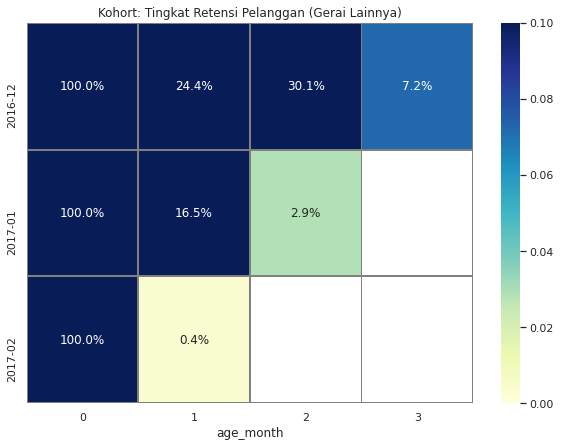

In [ ]:
# Menampilkan graifk tingkat retensi
sns.set(style='white')
plt.figure(figsize=(10, 7))
plt.title('Kohort: Tingkat Retensi Pelanggan (Gerai Lainnya)')
sns.heatmap(
    retention, annot=True, cmap='YlGnBu',fmt='.1%', linewidths=1, linecolor='gray', vmax=0.1, vmin=0,
    yticklabels = cohorts_another_shop.index.to_series().dt.strftime('%Y-%m'),
)

Kesimpulan:

Setelah melihat tingkat retensi melalui analisa kohort bahwa pelanggan yang masih banyak berbelanja pada gerai-gerai lainnya adalah pelanggan kohort Desember 2016. Bahkan di bulan 3 jumlah pelangganya lebih banyak dibanding kohort setelahnya pada bulan kedua dan pertamanya.

### Menyusun Metrik untuk kinerja gerai penjualan dan menghitungnya untuk setiap toko

In [ ]:
# Melihat data
df_final.head()

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,price_per_one,income,year,month,week,date
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3,0.42,4.62,2016-01-01,2016-12-01,2016-12-08,2016-12-10
1,541566,21873,35,2017-01-19 11:50:00,23401.0,1,Shop 22,0.42,14.70,2017-01-01,2017-01-01,2017-01-19,2017-01-19
2,538843,21873,1,2016-12-14 13:18:00,21712.0,0,Shop 9,0.42,0.42,2016-01-01,2016-12-01,2016-12-08,2016-12-14
3,540838,21873,11,2017-01-11 15:13:00,19541.0,0,Shop 4,0.42,4.62,2017-01-01,2017-01-01,2017-01-05,2017-01-11
4,543592,21873,5,2017-02-10 11:57:00,22922.0,1,Shop 15,0.42,2.10,2017-01-01,2017-02-01,2017-02-09,2017-02-10


Metrik-metrik yang mempengaruhi kinerja gerai dalam penjualan untuk setiap toko ada dua, yaitu:

- Kuantitas barang yang dibeli
- Harga
- Program Loyalitas

Metrik-metrik itu merupakan metrik yang mempunyai pengaruh untuk kinerja gerai dalam penjualannya.

In [ ]:
# Mengambil metrik-metrik diperlukan
metric_perform_retail = df_final[['shop_id', 'quantity', 'loyalty_program', 'price_per_one']]
metric_perform_retail['income'] = metric_perform_retail['quantity'] * metric_perform_retail['price_per_one']
metric_perform_retail

,shop_id,quantity,loyalty_program,price_per_one,income
0,Shop 3,11,0,0.42,4.62
1,Shop 22,35,1,0.42,14.70
2,Shop 9,1,0,0.42,0.42
3,Shop 4,11,0,0.42,4.62
4,Shop 15,5,1,0.42,2.10
...,...,...,...,...,...
69120,Shop 23,1,1,4.95,4.95
69121,Shop 0,5,0,0.42,2.10
69122,Shop 1,23,0,0.42,9.66
69123,Shop 19,2,0,4.95,9.90


In [ ]:
# Mengidentifikasi pelanggan yang mengikuti program loyalitas
metric_loyalty_program = metric_perform_retail.loc[metric_perform_retail['loyalty_program'] == 1]
metric_loyalty_program

,shop_id,quantity,loyalty_program,price_per_one,income
1,Shop 22,35,1,0.42,14.70
4,Shop 15,5,1,0.42,2.10
8,Shop 21,1,1,0.42,0.42
11,Shop 18,35,1,0.42,14.70
14,Shop 3,1,1,0.42,0.42
...,...,...,...,...,...
69114,Shop 23,1,1,5.94,5.94
69117,Shop 23,1,1,7.95,7.95
69118,Shop 8,35,1,0.38,13.30
69119,Shop 14,1,1,1.95,1.95


In [ ]:
# Mengelompokan jumlah total barang yang terjual dan pendapatan berdasarkan toko
total_income_loyalty_program = metric_loyalty_program.groupby('shop_id').agg({'quantity' :'sum', 'income' : 'sum'})
total_income_loyalty_program

,quantity,income
shop_id,,
Shop 0,5715,7401.64
Shop 1,6076,6692.07
Shop 10,7997,6389.02
Shop 11,6772,8181.53
Shop 12,6253,8980.61
Shop 13,7983,10597.07
Shop 14,5850,7967.77
Shop 15,8880,9246.40
Shop 16,8389,9787.10


In [ ]:
# Mengidentifikasi pelanggan yang tidak mengikuti program loyalitas
metric_non_loyalty_program = metric_perform_retail.loc[metric_perform_retail['loyalty_program'] == 0]
metric_non_loyalty_program

,shop_id,quantity,loyalty_program,price_per_one,income
0,Shop 3,11,0,0.42,4.62
2,Shop 9,1,0,0.42,0.42
3,Shop 4,11,0,0.42,4.62
5,Shop 17,71,0,0.42,29.82
6,Shop 18,1,0,0.42,0.42
...,...,...,...,...,...
69116,Shop 9,11,0,0.00,0.00
69121,Shop 0,5,0,0.42,2.10
69122,Shop 1,23,0,0.42,9.66
69123,Shop 19,2,0,4.95,9.90


In [ ]:
# Mengelompokan jumlah total barang yang terjual dan pendapatan berdasarkan toko
total_income_non_loyalty_program = metric_non_loyalty_program.groupby('shop_id').agg({'quantity' :'sum', 'income' : 'sum'})
total_income_non_loyalty_program

,quantity,income
shop_id,,
Shop 0,18447,22950.74
Shop 1,17288,21388.68
Shop 10,22333,28381.72
Shop 11,14697,17491.41
Shop 12,12672,14501.15
Shop 13,22779,31368.49
Shop 14,15098,19596.44
Shop 15,100321,105160.51
Shop 16,11561,13223.12


In [ ]:
# Total pendapatan untuk semua toko yang pelanggannya mengikuti program loyalitas
total_income_loyalty_program['income'].sum().round()

292950.0

In [ ]:
# Total pendapatan untuk semua toko yang pelanggannya tidak mengikuti program loyalitas
total_income_non_loyalty_program['income'].sum().round()

857772.0

Bahwa untuk pendapatan gerai, ternyata yang mengikuti program loyalitas penpadatannya lebih kecil daripada yang tidak mengikuti program loyalitas.

In [ ]:
# Melihat pendapatan terkecil untuk yang pelanggannya mengikuti program loyalitas
total_income_loyalty_program['income'].min()

5264.160000000002

In [ ]:
# Mencari tokonya
total_income_loyalty_program[total_income_loyalty_program['income'] == 5264.160000000002]

,quantity,income
shop_id,,
Shop 28,4149,5264.16


In [ ]:
# Melihat pendapatan terkecil untuk yang pelanggannya tidak mengikuti program loyalitas
total_income_non_loyalty_program['income'].min()

13223.120000000017

In [ ]:
# Mencari tokonya
total_income_non_loyalty_program[total_income_non_loyalty_program['income'] == 13223.120000000017]

,quantity,income
shop_id,,
Shop 16,11561,13223.12


Bahkan untuk pendapatan terkecil bahwa pelanggan yang tidak mengikuti program loyalitas masih lebih banyak memberi pendapatan dibanding pelanggan yang mengikuti program loyalitas.

In [ ]:
# Melihat pendapatan terbesar untuk yang pelanggannya mengikuti program loyalitas
total_income_loyalty_program['income'].max()

18300.130000000026

In [ ]:
# Mencari tokonya
total_income_loyalty_program[total_income_loyalty_program['income'] == 18300.130000000026]

,quantity,income
shop_id,,
Shop 29,8562,18300.13


In [ ]:
# Melihat pendapatan terbesar untuk yang pelanggannya tidak mengikuti program loyalitas
total_income_non_loyalty_program['income'].max()

105160.50999999994

In [ ]:
# Mencari tokonya
total_income_non_loyalty_program[total_income_non_loyalty_program['income'] == 105160.50999999994]

,quantity,income
shop_id,,
Shop 15,100321,105160.51


Untuk pendapatan juga sama, bahwa pendapatan terbesar dipimpin oleh pelanggan yang tidak mengikuti program loyalitas.

In [ ]:
# Melihat total barang yang terjual untuk pelanggannya mengikuti program loyalitas
total_income_loyalty_program['quantity'].sum()

244389

In [ ]:
# Melihat total barang yang terjual untuk pelanggannya tidak mengikuti program loyalitas
total_income_non_loyalty_program['quantity'].sum()

728804

Bahwa pelanggan yang tidak mengikuti program loyalitas lebih banyak membeli barang ketimbang yang mengikuti program loyalitas.

In [ ]:
# Melihat barang yang terjual paling sedikit untuk pelanggannya mengikuti program loyalitas
total_income_loyalty_program['quantity'].min()

4149

In [ ]:
# Mencari tokonya
total_income_loyalty_program[total_income_loyalty_program['quantity'] == 4149]

,quantity,income
shop_id,,
Shop 28,4149,5264.16


In [ ]:
# Melihat barang yang terjual paling sedikit untuk pelanggannya tidak mengikuti program loyalitas
total_income_non_loyalty_program['quantity'].min()

11561

In [ ]:
# Mencari tokonya
total_income_non_loyalty_program[total_income_non_loyalty_program['quantity'] == 11561]

,quantity,income
shop_id,,
Shop 16,11561,13223.12


Barang yang terjual paling seidikit ternyata lebih banyak untuk pelanggan yang tidak mengikuti program loyalitas dibanding pelanggan yang mengikuti program loyalitas.

In [ ]:
# Melihat barang yang terjual paling banyak untuk pelanggannya mengikuti program loyalitas
total_income_loyalty_program['quantity'].max()

16366

In [ ]:
# Mencari tokonya
total_income_loyalty_program[total_income_loyalty_program['quantity'] == 16366]

,quantity,income
shop_id,,
Shop 3,16366,12786.77


In [ ]:
# Melihat barang yang terjual paling sedikit untuk pelanggannya tidak mengikuti program loyalitas
total_income_non_loyalty_program['quantity'].max()

100321

In [ ]:
# Mencari tokonya
total_income_non_loyalty_program[total_income_non_loyalty_program['quantity'] == 100321]

,quantity,income
shop_id,,
Shop 15,100321,105160.51


Barang yang terjual paling banyak ternyata lebih banyak untuk pelanggan yang tidak mengikuti program loyalitas dibanding pelanggan yang mengikuti program loyalitas.

In [ ]:
# Mengurutkan untuk total barang terjual untuk semua toko dan semua jenis pelanggan
total_income_non_loyalty_program.sort_values('quantity', ascending=False)

,quantity,income
shop_id,,
Shop 15,100321,105160.51
Shop 21,85189,90935.87
Shop 5,32116,48865.80
Shop 4,29967,35353.16
Shop 17,25501,19426.73
Shop 20,25478,32940.38
Shop 28,23596,28433.98
Shop 13,22779,31368.49
Shop 10,22333,28381.72


In [ ]:
# Mengurutkan untuk total pendapatan untuk semua toko dan semua jenis pelanggan
total_income_non_loyalty_program.sort_values('income', ascending=False)

,quantity,income
shop_id,,
Shop 15,100321,105160.51
Shop 21,85189,90935.87
Shop 5,32116,48865.80
Shop 4,29967,35353.16
Shop 20,25478,32940.38
Shop 13,22779,31368.49
Shop 28,23596,28433.98
Shop 10,22333,28381.72
Shop 25,20997,27211.66


Bahwa semakin banyak jumlah barang terjual maka semakin banyak pendapatan dari toko tersebut diterima.

Kesimpulan:

Baik barang yang terjual dan total pendapatan bahwa untuk pelanggan yang tidak mengikuti program loyalitas lebih banyak memberi kontribusi dibanding pelanggan yang mengikuti program loyalitas. Dan bahwa semakin banyak jumlah barang terjual maka semakin banyak pendapatan dari toko tersebut diterima.

Kuantitas menjadi metrik penting karena semakin banyak barang yang terjual maka semakin banyak pendapatan yang diterima suatu toko. Program loyalitas sepertinya bukan merupakan metrik penting karena pengaruhnya tidak bisa memberi keuntungan bagi toko-tokonya, selain itu didata tidak ada informasi tamabahan untuk mengetahui pelanggan yang menggunakan program loyalitas bisa mendapatkan keuntungannya sebagai anggota program tersebut.

## Uji Hipotesis Statistik

Uji hipotesis stastik ini untuk menguji apakah ukuran rata-rata pembelian untuk anggota program loyalitas lebih tinggi daripada non-anggota program loyalitas. Uji ini menggunakan `Uji Persamaan rata-rata dua populasi`. Karena uji ini fokus untuk membandingkan dua populasi dalam satu tabel (Anggota program loyalitas dan Non-anggota program loyalitas).Alpha yang dipakai adalah 5% sesuai dengan dunia data.

Ukuran rata-rata pembelian memiliki banyak maksud bisa dari harga, kuantitas, jumlah pembelian. Maka dari itu kita akan menguji berdasarkan total jumlah pendapatan yang dikeluarkan per-customer, total kuantitas barang yang dibeli per-customer, dan berapa kali pembayaran yang dilakukan per-customer.

In [ ]:
# Melihat data
df_final.head()

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,price_per_one,income,year,month,week,date
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3,0.42,4.62,2016-01-01,2016-12-01,2016-12-08,2016-12-10
1,541566,21873,35,2017-01-19 11:50:00,23401.0,1,Shop 22,0.42,14.70,2017-01-01,2017-01-01,2017-01-19,2017-01-19
2,538843,21873,1,2016-12-14 13:18:00,21712.0,0,Shop 9,0.42,0.42,2016-01-01,2016-12-01,2016-12-08,2016-12-14
3,540838,21873,11,2017-01-11 15:13:00,19541.0,0,Shop 4,0.42,4.62,2017-01-01,2017-01-01,2017-01-05,2017-01-11
4,543592,21873,5,2017-02-10 11:57:00,22922.0,1,Shop 15,0.42,2.10,2017-01-01,2017-02-01,2017-02-09,2017-02-10


In [ ]:
# Mengidentifikasi yang mengikuti anggota program loyalitas
member = df_final.query('loyalty_program == 1')
member.head()

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,price_per_one,income,year,month,week,date
1,541566,21873,35,2017-01-19 11:50:00,23401.0,1,Shop 22,0.42,14.70,2017-01-01,2017-01-01,2017-01-19,2017-01-19
4,543592,21873,5,2017-02-10 11:57:00,22922.0,1,Shop 15,0.42,2.10,2017-01-01,2017-02-01,2017-02-09,2017-02-10
8,542608,21873,1,2017-01-30 13:51:00,22449.0,1,Shop 21,0.42,0.42,2017-01-01,2017-01-01,2017-01-26,2017-01-30
11,539252,21873,35,2016-12-16 14:17:00,23423.0,1,Shop 18,0.42,14.70,2016-01-01,2016-12-01,2016-12-15,2016-12-16
14,544930,21873,1,2017-02-24 18:26:00,23151.0,1,Shop 3,0.42,0.42,2017-01-01,2017-02-01,2017-02-23,2017-02-24


In [ ]:
# Mengelompokan total pemabyaran, total kuantitas, dan total pendapatan dari customer yang menggunakan program loyalty
member_purchase_size = member.groupby(['customer_id', 'loyalty_program']).agg({'purchase_id':'count', 
                                                                               'quantity':'sum', 
                                                                               'income':'sum'}).reset_index()
member_purchase_size.columns = ['customer_id', 'loyalty_program', 
                                'purchase_count', 'total_quantity',
                                'total_spend']
member_purchase_size

,customer_id,loyalty_program,purchase_count,total_quantity,total_spend
0,22005.0,1,43,63,260.18
1,22006.0,1,101,766,743.37
2,22011.0,1,11,32,77.54
3,22012.0,1,4,4280,2299.97
4,22018.0,1,20,20,69.89
...,...,...,...,...,...
582,23938.0,1,7,109,30.05
583,23939.0,1,40,459,409.84
584,23948.0,1,8,76,77.80
585,23956.0,1,1,2,0.00


In [ ]:
# Mengidentifikasi yang tidak mengikuti anggota program loyalitas
non_member = df_final.query('loyalty_program == 0')
non_member.head()

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,price_per_one,income,year,month,week,date
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3,0.42,4.62,2016-01-01,2016-12-01,2016-12-08,2016-12-10
2,538843,21873,1,2016-12-14 13:18:00,21712.0,0,Shop 9,0.42,0.42,2016-01-01,2016-12-01,2016-12-08,2016-12-14
3,540838,21873,11,2017-01-11 15:13:00,19541.0,0,Shop 4,0.42,4.62,2017-01-01,2017-01-01,2017-01-05,2017-01-11
5,544651,21873,71,2017-02-22 12:51:00,19373.0,0,Shop 17,0.42,29.82,2017-01-01,2017-02-01,2017-02-16,2017-02-22
6,545062,21873,1,2017-02-27 14:07:00,18427.0,0,Shop 18,0.42,0.42,2017-01-01,2017-02-01,2017-02-23,2017-02-27


In [ ]:
# Mengelompokan total pemabyaran, total kuantitas, dan total pendapatan dari customer yang tidak menggunakan program loyalty
non_member_purchase_size = non_member.groupby(['customer_id', 'loyalty_program']).agg({'purchase_id':'count', 
                                                                                       'quantity':'sum', 
                                                                                       'income':'sum'}).reset_index()
non_member_purchase_size.columns = ['customer_id', 'loyalty_program', 
                                    'purchase_count', 'total_quantity',
                                    'total_spend']
non_member_purchase_size

,customer_id,loyalty_program,purchase_count,total_quantity,total_spend
0,18025.0,0,2,148430,154367.20
1,18026.0,0,60,574,751.11
2,18027.0,0,23,1833,738.15
3,18029.0,0,17,181,194.36
4,18031.0,0,15,83,152.07
...,...,...,...,...,...
1157,21985.0,0,41,446,462.83
1158,21994.0,0,14,62,137.24
1159,21995.0,0,21,215,174.25
1160,21996.0,0,30,352,352.83


### Menyatakan Hipotesis dan Uji Hipotesisnya

Hipotesisnya:

- H0 : Bahwa pembelian rata-rata untuk anggota program loyalitas dan pembelian rata-rata untuk non-anggota program loyalitas adalah sama
- H1 : Bahwa pembelian rata-rata untuk anggota program loyalitas dan pembelian rata-rata untuk non-anggota program loyalitas adalah tidak sama

In [ ]:
# Melakukan test hipotesis

# Set Alpha
alpha = 0.05

# Melakukan uji testnya
results_member_nonmember = st.ttest_ind(member_purchase_size['purchase_count'], non_member_purchase_size['purchase_count'], equal_var=False)
p_value = results_member_nonmember.pvalue

print('p-value: ', results_member_nonmember.pvalue)

if p_value < alpha:
    print('Hipotesis nol ditolak : ada perbedaan statistik yang signifikan antara pembelian rata-rata untuk anggota program loyalitas dan pembelian rata-rata untuk non-anggota program loyalitas')
else:
    print('Hipotesis nol gagal ditolak : tidak ada perbedaan statistik yang signifikan antara pembelian rata-rata untuk anggota program loyalitas dan pembelian rata-rata untuk non-anggota program loyalitas')

p-value:  0.5580969724516507
Hipotesis nol gagal ditolak : tidak ada perbedaan statistik yang signifikan antara pembelian rata-rata untuk anggota program loyalitas dan pembelian rata-rata untuk non-anggota program loyalitas


In [ ]:
# Menghitung rata-rata pembelian dari anggota yang menggunakan program loyalitas dan tidak
meanpurchase_without_loyalty = non_member_purchase_size['purchase_count'].mean().round(decimals=2)
meanpurchase_with_loyalty = member_purchase_size['purchase_count'].mean().round(decimals=2)

print('Rata-rata pembelian untuk anggota yang tidak menggunakan program loyalitas adalah {0:.0f}.'.format(meanpurchase_without_loyalty))
print('Rata-rata pembelian untuk anggota yang menggunakan program loyalitas adalah {0:.0f}.'.format(meanpurchase_with_loyalty))

Rata-rata pembelian untuk anggota yang tidak menggunakan program loyalitas adalah 39.
Rata-rata pembelian untuk anggota yang menggunakan program loyalitas adalah 41.


Hasil Uji Hipotsis menyatakan `Hipotesisi nol gagal ditolak` artinya bahwa rata-rata pembelian untuk anggota yang menggunakan program loyalitas dan rata-rata pembelian untuk anggota yang tidak menggunakan program loyalitas `adalah sama`. Dalam membandingkan rata-rata pembelian secara langsung itu tidak sama tetapi tidak signifikan juga pebedaannya dan uniknya lagi bahwa `Rata-rata pembelian untuk anggota yang menggunakan program loyalitas` lebih tinggi dibanding `Rata-rata pembelian untuk anggota yang tidak menggunakan program loyalitas`.

## Kesimpulan dan Rekomendasi

### Kesimpulan

Gerai-gerai ini merupakan `Gerai Besar` berdasarkan tingkat penjualan paling banyak:

- Shop 0
- Shop 1
- Shop 5
- Shop 9
- Shop 13
- Shop 14
- Shop 15
- Shop 20
- Shop 22
- Shop 24
- Shop 30

Jumlah total pelanggan untuk gerai-gerai besar yaitu 1439 pelanggan untuk semua gerai dan rata-rata pelanggan untuk gerai-gerai besar yaitu 131 pelanggan untuk setiap per-gerai. `Shop 5` mempunyai pelanggan terbanyak untuk gerai besar dengan total 138 pelanggan. Jumlah total pembayaran yang dilakukan pelanggan untuk gerai-gerai besar yaitu 27775 pembayaran untuk semua gerai dan rata-rata pembayaran yang dilakukan pelanggan untuk gerai-gerai besar yaitu 2525 pembayaran berdasarkan per-gerai. `Shop 1` mempunyai pemabayaran terbanyak yang dilakukan pelanggan dalam kategori gerai besar.

Jumlah pembayaran yang dilakukan pelanggan untuk waktu yang ditentukan adalah 27775 pemabayaran yang sudah dilakukan dan jumlah rata-rata pembayaran yang dilakukan pelanggan untuk waktu yang ditentukan adalah 408 pembayaran yang dilakukan dalam per-harinya. Pembayaran yang paling sedikit dilakukan terjadi pada tanggal 22 Desember 2016 dengan jumlah pembayaran terjadi 75 kali. dan pembayaran yang paling banyak dilakukan terjadi pada tanggal 5 Desember 2016 dengan jumlah pembayaran terjadi 1381 kali.

Jumlah pelanggan dalam setiap harinya untuk waktu ditentukan adalah 1453 pelanggan. dan rata-rata pelanggan selama waktu yang ditentukan adalah 21 pelanggan dalam per-harinya. Jumlah pelanggan yang melakukan pembayaran paling sedikit adalah 6 pelanggan yang terjadi pada tanggal 30 Januari 2017 dan jumlah pelanggan yang melakukan pembayaran paling banyak adalah 49 pelanggan yang terjadi pada tanggal 9 Desember 2016.

Total barang yang sudah terjualan sebanyak 399.733 barang dan rata-rata barang yang terjual untuk setiap pembayarannya yaitu 260 per-pembayaran. Jumlah barang yang paling banyak yaitu 74.214 barang dalam sekali pembayaran dan jumlah barang yang paling sedikit yaitu 1 barang dalam sekali pembayaran.

Jumlah barang yang masuk keranjang ada 399.733 barang untuk semua gerai besar dan rata-rata barang yang masuk keranjang ada 36.339 barang untuk semua gerai besar. `Shop 15` merupakan toko paling banyak untuk keranjang barangnya dengan total 109.201 barang dan `Shop 14` merupakan toko paling sedikit untuk keranjang barangnya dengan total 20.948 barang.

Jumlah barangnya berdasarkan per-hari totalnya ada 399.733 barang dan rata-rata barang yang masuk keranjang sebanyak 5.878 untuk per-harinya. Jumlah barang yang paling banyak masuk keranjang yaitu sebanyak 75.562 barang pada tanggal 18 Januari 2017 dan jumlah barang yang paling sedikit masuk keranjang yaitu sebanyak 511 barang pada tanggal 30 Januari 2017.

Untuk pelanggan yang mengikuti program loyalitas paling banyak pada toko Shop 13 dan yang paling sedikit pada toko Shop 30. Untuk pelanggan yang tidak mengikuti program loyalitas paling banyak pada toko Shop 5 dan yang paling sedikit pada toko Shop 13.

Jumlah pelanggan yang mengikuti program loyalitas sebanyak 452 pelanggan. `Shop 30` adalah toko dengan jumlah pelanggan yang paling sedikit mengikuti program loyalitas dengan jumlah pelanggan 36 orang dan `Shop 13` adalah toko dengan jumlah pelanggan yang paling banyak mengikuti program loyalitas dengan jumlah pelanggan 50 orang.

Jumlah pelanggan yang tidak mengikuti program loyalitas sebanyak 987 pelanggan. `Shop 13` adalah toko dengan jumlah pelanggan yang paling sedikit tidak mengikuti program loyalitas dengan jumlah pelanggan 78 orang `Shop 13` adalah toko dengan jumlah pelanggan yang paling banyak tidak mengikuti program loyalitas dengan jumlah pelanggan 78 orang.

Gerai-gerai ini merupakan `Gerai Lainnya`.

- Shop 2
- Shop 3
- Shop 4
- Shop 6
- Shop 7
- Shop 8
- Shop 10
- Shop 11
- Shop 12
- Shop 16
- Shop 17
- Shop 18
- Shop 19
- Shop 21
- Shop 23
- Shop 25
- Shop 27
- Shop 28
- Shop 29

Jumlah total pelanggan untuk gerai-gerai lainnya yaitu 2283 pelanggan untuk semua gerai. dan rata-rata pelanggan untuk gerai-gerai lainnya yaitu 120.0 pelanggan untuk setiap per-gerai. `Shop 7` mempunyai pelanggan terbanyak untuk gerai lainnya sebanyak 139 pelanggan.

Jumlah total pembayaran yang dilakukan pelanggan untuk gerai-gerai lainnya yaitu 39010 pembayaran untuk semua gerai dan rata-rata pembayaran yang dilakukan pelanggan untuk gerai-gerai lainnya yaitu 2053.0 pembayaran berdasarkan per-gerai. `Shop 7` mempunyai pembayaran terbanyak yang dilakukan pelanggan dalam kategori gerai lainnya.

Jumlah pembayaran yang dilakukan pelanggan untuk waktu yang ditentukan adalah 39010 pemabayaran yang sudah dilakukan dan rata-rata pembayaran yang dilakukan pelanggan untuk waktu yang ditentukan adalah 574 pembayaran yang dilakukan dalam per-harinya. Pembayaran yang paling sedikit dilakukan terjadi pada tanggal 6 Februari 2017 dengan jumlah pembayaran terjadi 66 kali dan pembayaran yang paling banyak dilakukan terjadi pada tanggal 1 Desember 2016 dengan jumlah pembayaran terjadi 1350 kali.

Jumlah pelanggan dalam setiap harinya untuk waktu ditentukan adalah 2248 pelanggan dan rata-rata pelanggan selama waktu yang ditentukan adalah 33 pelanggan dalam per-harinya. Jumlah pelanggan yang melakukan pembayaran paling sedikit adalah 4 pelanggan yang terjadi pada tanggal 6 Februari 2017 dan jumlah pelanggan yang melakukan pembayaran paling banyak adalah 84 pelanggan yang terjadi pada tanggal 16 Desember 2016.

Total barang yang sudah terjualan sebanyak 548.647 barang dan rata-rata barang yang terjual untuk setiap pembayarannya yaitu 223 per-pembayaran. Jumlah barang yang paling banyak yaitu 74.216 barang dalam sekali pembayaran dan jumlah barang yang paling sedikit yaitu 1 barang dalam sekali pembayaran.

Jumlah barang yang masuk keranjang ada 548.647 barang untuk semua gerai lainnya dan rata-rata barang yang masuk keranjang ada 28.876 barang untuk semua gerai besar. `Shop 21` merupakan toko paling banyak untuk keranjang barangnya dengan total 89.685 barang dan `Shop 12` merupakan toko paling sedikit untuk keranjang barangnya dengan total 18.925 barang.

Semua seperti diatas, jumlah barangnya berdasarkan per-hari totalnya ada 548.647 barang dan rata-rata barang yang masuk keranjang sebanyak 8.068 untuk per-harinya. Jumlah barang yang paling banyak masuk keranjang yaitu sebanyak 78.879 barang pada tanggal 18 Januari 2017 dan jumlah barang yang paling sedikit masuk keranjang yaitu sebanyak 785 barang pada tanggal 19 Desember 2017.

Untuk pelanggan yang mengikuti program loyalitas paling banyak pada toko `Shop 7` dan yang paling sedikit pada toko `Shop 28`. Untuk pelanggan yang tidak mengikuti program loyalitas paling banyak pada toko `Shop 19` dan yang paling sedikit pada toko `Shop 3`.

Jumlah pelanggan yang mengikuti program loyalitas sebanyak 767 pelanggan. `Shop 28` adalah toko dengan jumlah pelanggan yang paling sedikit mengikuti program loyalitas dengan jumlah pelanggan 33 orang `Shop 7` adalah toko dengan jumlah pelanggan yang paling banyak mengikuti program loyalitas dengan jumlah pelanggan 49 orang.

Jumlah pelanggan yang tidak mengikuti program loyalitas sebanyak 1516 pelanggan. `Shop 3` adalah toko dengan jumlah pelanggan yang paling sedikit tidak mengikuti program loyalitas dengan jumlah pelanggan 57 orang dan `Shop 19` adalah toko dengan jumlah pelanggan yang paling banyak tidak mengikuti program loyalitas dengan jumlah pelanggan 102 orang.

Baik barang yang terjual dan total pendapatan bahwa untuk pelanggan yang tidak mengikuti program loyalitas lebih banyak memberi kontribusi dibanding pelanggan yang mengikuti program loyalitas. Dan bahwa semakin banyak jumlah barang terjual maka semakin banyak pendapatan dari toko tersebut diterima. Kuantitas menjadi metrik penting karena semakin banyak barang yang terjual maka semakin banyak pendapatan yang diterima suatu toko. Program loyalitas sepertinya bukan merupakan metrik penting karena pengaruhnya tidak bisa memberi keuntungan bagi toko-tokonya, selain itu didata tidak ada informasi tamabahan untuk mengetahui pelanggan yang menggunakan program loyalitas bisa mendapatkan keuntungannya sebagai anggota program tersebut.

Hasil Uji Hipotsis menyatakan `Hipotesisi nol gagal ditolak` artinya bahwa rata-rata pembelian untuk anggota yang menggunakan program loyalitas dan rata-rata pembelian untuk anggota yang tidak menggunakan program loyalitas `adalah sama`. Dalam membandingkan rata-rata pembelian secara langsung itu tidak sama tetapi tidak signifikan juga pebedaannya dan uniknya lagi bahwa `Rata-rata pembelian untuk anggota yang menggunakan program loyalitas` lebih tinggi dibanding `Rata-rata pembelian untuk anggota yang tidak menggunakan program loyalitas`.

###  Rekomendasi

Bahwa `Program Loyalitas` tidaklah maskmial fungsinya. Hal ini terlihat jelas pada tabel `Retail` yang tidak mempunyai informasi apapun untuk pengguna yang mengikuti programnya seperti promo, penawaran spesial, dan hadiah. Hal itu semakin jelas ketika menganalisa perbedaan pendapatan dan rata-rata penjualan baik dari gerai maupun waktunya dari sisi perbandingan anggota yang mengikuti dan tidak mengikuti programnya bahwa yang tidak mengikuti punya kontribusi lebih besar untuk kinerja gerai-gerai tersebut di banding yang mengikuti programnya. 

Sebaiknya `Program Loyalitas` dievaluasi lagi untuk bagaimana program ini agar menjadi nyata dijalankan dan  berfungsi untuk memberi kontribusi pada kinerja gerai-gerainya. Seperti memberi penjelasan pada tabel promo apa yang sedang digunakan, untuk program ini bisa dijalankan disesuaikan seperti untuk `Gerai Besar` lebih untuk mempertahankan pelanggannya dan `Gerai Lainnya` untuk mendorong tingkat pembelian yang bermanfaat untuk kinerja gerai.

## Dokumentasi dan Refrensi 

Link Tableau :

https://public.tableau.com/views/SalesOutletsPerformancePracticumProject13-AriqDewoPangestu/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link

Link Presentasi : 

https://drive.google.com/file/d/1xFQELt_u7InI-Ogp4qB6PwmiufnKeGYi/view?usp=sharing

Adapun selama pengerjaan proyek terakhir ini menggunakan beberapa refrensi baik dari materi platofrim Practicum sendiri maupun refrensi dari luar untuk membantu menyelesaikan dengan baik dari sisi pengerjaan codingnya maupun analisisnya. 

Dokumentasi Daftar Refrensi : 

- https://www.statology.org/pandas-remove-characters-from-string/
- https://www.rigordatasolutions.com/post/how-to-use-count-and-count-distinct-in-tableau
- https://www.cpgdatainsights.com/glossary-post/purchase-size/

<div class="alert alert-block alert-success">

# General comments #1
<b>Reviewer's comment</b> <a class="tocSkip"></a> 

Good Job Ariq! Sebagian besar kamu telah menyelesaikan project ini dengan baik dan sudah sesuai ya!
    
Keep going Ariq, you are doing very well!
    

</div>